# Figure_touchups.ipynb
removing duplicated legends, adding texts, panel letters, merging side by side plots for simulated data vs real data...

In [1]:
# import pandas as pd

# df = pd.read_csv('/home/solprof/Downloads/run_t_16_nc_150_ns_5_ir_1_100_lm_0_5_prc_0.5/tools_results.tsv', sep='\t')
# # Count total true pairs (ground truth) per mismatch
# total_pairs = df.groupby('mismatches')[['spacer_id', 'contig_id']].nunique().groupby('mismatches').size()

# # Count found pairs per tool and mismatch
# found_pairs = df.groupby(['tool', 'mismatches'])[['spacer_id', 'contig_id']].nunique().reset_index()

# # If you have a ground truth file, use that for total_pairs instead!
# # For now, let's assume all pairs in the file are true positives.

# # Calculate recall (here, recall will be 1.0 for all if all are true positives)
# found_pairs['recall'] = found_pairs['spacer_id'] / found_pairs['spacer_id'].max()  # adjust as needed

# # For each mismatch, find the maximum number of found pairs (best tool = reference)
# max_found_per_mismatch = found_pairs.groupby('mismatches')['found'].max().reset_index(name='total')

# # Merge to get the denominator for recall
# results = pd.merge(found_pairs, max_found_per_mismatch, on='mismatches')

# # Calculate recall
# results['recall'] = results['found'] / results['total']

# # Keep only the columns you want
# results = results[['tool', 'mismatches', 'recall']]


# import altair as alt

# chart = alt.Chart(results.to_pandas()).mark_line(point=True).encode(
#     x=alt.X('mismatches:Q', title='Number of Mismatches'),
#     y=alt.Y('recall:Q', title='Recall'),
#     color=alt.Color('tool:N', title='Tool'),
#     tooltip=['tool', 'mismatches', 'recall']
# ).properties(
#     width=600,
#     height=400,
#     title='Recall by Number of Mismatches per Tool'
# )

# chart.save('recall_by_mismatches.html')
# chart.display()

In [2]:
# import pandas as pd

# # Load data
# results_df = pd.read_csv('/home/solprof/Downloads/run_t_16_nc_150_ns_5_ir_1_100_lm_0_5_prc_0.5/tools_results.tsv', sep='\t')
# gt_df = pd.read_csv('/home/solprof/Downloads/run_t_16_nc_150_ns_5_ir_1_100_lm_0_5_prc_0.5/simulated_data/ground_truth.tsv', sep='\t')

# # Helper: is a result a true positive (within ±2 start/end)?
# def is_match(row, gt):
#     matches = gt[
#         (gt['spacer_id'] == row['spacer_id']) &
#         (gt['contig_id'] == row['contig_id']) &
#         (gt['mismatches'] == row['mismatches']) &
#         (gt['strand'] == row['strand']) &
#         (abs(gt['start'] - row['start']) <= 0) &
#         (abs(gt['end'] - row['end']) <= 0)
#     ]
#     return not matches.empty

# results_df['is_tp'] = results_df.apply(lambda row: is_match(row, gt_df), axis=1)

# # True positives per tool/mismatch
# tp = results_df[results_df['is_tp']].groupby(['tool', 'mismatches']).size().reset_index(name='tp')
# # False positives per tool/mismatch
# fp = results_df[~results_df['is_tp']].groupby(['tool', 'mismatches']).size().reset_index(name='fp')
# # False negatives per mismatch (ground truth not found by tool)
# def is_fn(row, res):
#     matches = res[
#         (res['spacer_id'] == row['spacer_id']) &
#         (res['contig_id'] == row['contig_id']) &
#         (res['mismatches'] == row['mismatches']) &
#         (res['strand'] == row['strand']) &
#         (abs(res['start'] - row['start']) <= 2) &
#         (abs(res['end'] - row['end']) <= 2)
#     ]
#     return matches.empty

# # For each tool, count FNs per mismatch
# fn_list = []
# for tool in results_df['tool'].unique():
#     tool_res = results_df[results_df['tool'] == tool]
#     gt_df['is_fn'] = gt_df.apply(lambda row: is_fn(row, tool_res), axis=1)
#     fn = gt_df[gt_df['is_fn']].groupby('mismatches').size().reset_index(name='fn')
#     fn['tool'] = tool
#     fn_list.append(fn)
# fn = pd.concat(fn_list)

# # Merge all
# metrics = tp.merge(fp, on=['tool', 'mismatches'], how='outer').merge(fn, on=['tool', 'mismatches'], how='outer').fillna(0)

# # Calculate metrics
# metrics['recall'] = metrics['tp'] / (metrics['tp'] + metrics['fn'])
# metrics['precision'] = metrics['tp'] / (metrics['tp'] + metrics['fp'])
# metrics['f1'] = 2 * (metrics['precision'] * metrics['recall']) / (metrics['precision'] + metrics['recall'])

# # --- SWITCH METRIC HERE ---
# # metric_to_plot = 'recall'
# metric_to_plot = 'f1'
# # --------------------------

# plot_df = metrics[['tool', 'mismatches', metric_to_plot]].rename(columns={metric_to_plot: 'value'})

# # Only plot sassy and bowtei1
# plot_df = plot_df[plot_df['tool'].isin(['sassy', 'bowtie1'])]

# # Plot
# import altair as alt
# chart = alt.Chart(plot_df).mark_line(point=True).encode(
#     x=alt.X('mismatches:Q', title='Number of Mismatches'),
#     y=alt.Y('value:Q', title=metric_to_plot.upper()),
#     color=alt.Color('tool:N', title='Tool'),
#     tooltip=['tool', 'mismatches', 'value']
# ).properties(
#     width=600,
#     height=400,
#     title=f'{metric_to_plot.upper()} by Number of Mismatches per Tool'
# )
# chart.save(f'{metric_to_plot}_by_mismatches.html')
# chart.display()

In [ ]:
import os

os.chdir('/clusterfs/jgi/scratch/science/metagen/neri/code/blits/spacer_bench/')
import polars as pl
import matplotlib.pyplot as plt
# import glob
import altair as alt
import numpy as np
#from bench.utils.functions import *
pl.Config.set_tbl_cols(n=-1)

# from itables import init_notebook_mode
# init_notebook_mode(all_interactive=True)

polars.config.Config

Read results

In [30]:
# simulated_results = pl.read_parquet("./results/simulated/Runs/combined_sims/simulated_data/recalced_results.parquet")
# realdata_results = pl.read_parquet("./results/real_data/results/tools_results_mm_recalced.parquet")

In [ ]:
# mismatch_recall_results_realdata = pl.read_csv('results/real_data/results/tool_recall_vs_mismatches.tsv',separator='\t')
performence_results_simulated = pl.read_csv("/home/solprof/Downloads/run_t_16_nc_150_ns_5_ir_1_100_lm_0_5_prc_0.5/tools_results.tsv",separator='\t')

In [12]:
# shared_tools = set(performence_results_simulated['tool'].to_list()).intersection(set(mismatch_recall_results_realdata['tool'].to_list()))
# print(shared_tools)
# tools_list = [x for x in performence_results_simulated['tool'].unique() if x not in ["minimap2_og","minimap2_mod","mmseqs2map","bbmapskimmermod"]] 
# print(tools_list)

# Only for simulated data tool list
tools_list = [x for x in performence_results_simulated['tool'].unique() if x not in ["minimap2_og","minimap2_mod","mmseqs2map","bbmapskimmermod"]] 

In [13]:
tools_list

['hisat2',
 'bbmapskimmer',
 'bowtie2',
 'strobealign',
 'bwa_mem',
 'sassy',
 'bowtie1',
 'mummer4',
 'blastn']

## Recall figure
simulated vs real data 

In [14]:
metrics = {
    # 'precision': 'true_positives / (true_positives + false_positives)',
    'recall': 'true_positives / (true_positives + false_negatives)',
    # 'f1_score': ' 2 * (precision * recall) / (precision + recall)'
}

# Only the simulated data chart
base_chart = alt.Chart(performence_results_simulated.filter(pl.col('tool').is_in(tools_list))).mark_trail(color="tool:N").encode(
    x=alt.X("mismatches:Q", title="Number of Mismatches"),
    y=alt.Y(f"recall:Q", 
            title="true_positives / (true_positives + false_negatives)",
            scale=alt.Scale(domain=[0, 1.05])
            ),
    color=alt.Color("tool:N",
                    legend=None
                    ),  # Hide color legend
    shape=alt.Shape("tool:N",     # Shape legend will show both shape and color
                    legend=alt.Legend(
                        title="Tool",
                        orient="right",
                        symbolFillColor="tool:N",  # Use the color encoding for fill
                        symbolStrokeColor="tool:N", # Use the color encoding for stroke
                    )),
    tooltip=['tool', 'mismatches', 'recall']
).properties(
    width=600,
    height=400,
    title="Simulated Data".title()
)

# Configure the single chart
combined_chart = base_chart.configure_axis(
    grid=True,
    gridOpacity=0.9
).configure_view(step=1,
    strokeWidth=0.1
).configure_title(
    fontSize=16,
    anchor='middle'
)
combined_chart.save('./draft/main_text_tool_performance_by_mismatches.html')
combined_chart.save('./draft/main_text_tool_performance_by_mismatches.json',format='json')

import json as json
# Save the chart specification as JSON with the correct format
chart_json = combined_chart.to_json(format="vega")

# Parse the JSON
chart_spec = json.loads(chart_json)

# Replace the legends in the specification
# We'll need to traverse the spec to find where legends are defined damn it
def update_legends_in_spec(spec):
    # Define the new legend configuration
    new_legend = {
    "orient": "right",
    "symbolSize": 190,
    "symbolOpacity": 1,
    "symbolFillColor": "shape",
    "symbolStrokeColor": "tool:N",
    "title": "Tool",
    "shape": "shape",
    "fill": "color",
    "offset": 0,
    "encode": {
        "symbols": {
            "update": {
                "fillOpacity": {"value": 0.9}
            }
        }
    }}
    if isinstance(spec, dict):
        if 'legends' in spec:
            spec['legends'] = [new_legend]
        for value in spec.values():
            update_legends_in_spec(value)
    elif isinstance(spec, list):
        for item in spec:
            update_legends_in_spec(item)
    return spec

new_chart_spec = update_legends_in_spec(chart_spec)

# Write the modified specification to a file
def change_chart_spec(new_chart_spec,output_path):
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
        <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
        <script src="https://cdn.jsdelivr.net/npm/vega-lite@5"></script>
        <script src="https://cdn.jsdelivr.net/npm/vega-embed@6"></script>
        </head>
        <body>
        <div id="vis"></div>
        <script type="text/javascript">
            var spec = {json.dumps(new_chart_spec)};
            vegaEmbed('#vis', spec);
        </script>
        </body>
        </html>
        """
        
        with open(output_path, 'w') as f:
            f.write(html_content)
# chart_spec
# change_chart_spec(new_chart_spec, './draft/main_text_tool_performance_by_mismatches.html')

ValueError: Unable to determine data type for the field "recall"; verify that the field name is not misspelled. If you are referencing a field from a transform, also confirm that the data type is specified correctly.

In [52]:
combined_chart

alt.HConcatChart(...)

## tool vs tool matrixes


In [4]:
matrix_simulated = pl.read_csv(f'results/simulated/results/matrix_less_or_equal_3_mismatches.tsv',separator='\t').with_columns(pl.lit("simulated").alias("source"))
matrix_real = pl.read_csv(f'results/real_data/results/matrix_less_or_equal_3_mismatches.tsv',separator='\t').with_columns(pl.lit("real").alias("source"))
matrix_real

Summary of the matrixes: (one matrix with <=3 mismatches)

In [8]:
n_mismatches = 3

heatmap_filename = f'draft/figures/simulated_matrix__less_or_equal_3_mismatches'
chart_simulated = plot_matrix(matrix_simulated, f"Simulated-data tool pairwise comparison (<={n_mismatches} mismatches)", heatmap_filename)

heatmap_filename = f'draft/figures/real_matrix__less_or_equal_3_mismatches'
chart_real = plot_matrix(matrix_real, f"IMG/VR tool pairwise comparison (<={n_mismatches} mismatches)", heatmap_filename)
chart_real

alt.LayerChart(...)

In [20]:
import svgutils

In [24]:
chart_combined = svgutils.compose.Figure("34cm", "16.5cm", 
        svgutils.compose.Panel(
              svgutils.compose.SVG(("results/simulated/plots/matrix__less_or_equal_3_mismatches.svg")),
              svgutils.compose.Text("A", 25, 20, size=12, weight='bold')
             ),
        svgutils.compose.Panel(
              svgutils.compose.SVG(("results/real_data/plots/matrix__less_or_equal_3_mismatches.svg")),
              svgutils.compose.Text("B", 25, 20, size=12, weight='bold')
             ).move(1280, 0)
        ).save("fig_final_compose.svg")
chart_combined


In [ ]:
chart_combined = svgutils.compose.Figure("34cm", "16.5cm", 
        svgutils.compose.Panel(
              svgutils.compose.SVG(("results/simulated/plots/matrix__less_or_equal_3_mismatches.svg")),
              svgutils.compose.Text("A", 25, 20, size=12, weight='bold')
             ),
        svgutils.compose.Panel(
              svgutils.compose.SVG(("results/real_data/plots/matrix__less_or_equal_3_mismatches.svg")),
              svgutils.compose.Text("B", 25, 20, size=12, weight='bold')
             ).move(1280, 0)
        ).save("fig_final_compose.svg")
chart_combined


In [ ]:
# Create performance visualization charts
chart = alt.Chart(resdf).encode(
    x=alt.X('n_mismatch:Q', 
            title='Number of Mismatches',
            axis=alt.Axis(labelFontSize=12, titleFontSize=14)),
    y=alt.Y('f1_score:Q',
            title='F1 Score',
            scale=alt.Scale(domain=[0, 1.05]),
            axis=alt.Axis(labelFontSize=12, titleFontSize=14)),
    color=alt.Color('tool:N',
                   legend=alt.Legend(
                       title='Tool',
                       orient='right',
                       labelFontSize=12,
                       titleFontSize=14
                   )),
    tooltip=['tool', 'n_mismatch', 'f1_score']
).properties(
    width=600,
    height=400,
    title='Tool Performance vs Number of Mismatches'
)

# Create layered chart with lines and points
lines = chart.mark_line(size=2)
points = chart.mark_circle(size=100)
layered_chart = alt.layer(lines, points)

# Configure and save the chart
final_chart = layered_chart.configure_axis(
    grid=True,
    gridOpacity=0.2,
    domain=True
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=16,
    anchor='middle'
)

final_chart.save('./results/simulated/plots/tool_performance_vs_mismatches.html')
final_chart.save('./results/simulated/plots/tool_performance_vs_mismatches.svg')

# Print statistics
print("\nStatistics per mismatch level:")
stats = resdf.sort(['n_mismatch', 'f1_score'], descending=[False, True])\
    .select(['n_mismatch', 'tool', 'precision', 'recall', 'f1_score'])
print(stats)
# Save to file
stats.write_csv('./results/simulated/results/tool_performance_by_mismatches.tsv', separator='\t')

Create base charts for each metric

In [35]:
# First, create a complete grid of all tool-mismatch combinations and fill missing values with 0
all_mismatches = resdf['n_mismatch'].unique().to_list()
all_tools = resdf['tool'].unique().to_list()
tools_list = resdf['tool'].unique().to_list() # removing certain variants of the same tool for the main text figure.
all_tools = list(set(tools_list).difference(set(["minimap2_og","minimap2_mod","mmseqs2map","bbmapskimmermod"])))

# Create all possible combinations
complete_grid = (
    pl.DataFrame({
        'tool': [tool for tool in all_tools for _ in all_mismatches],
        'n_mismatch': [m for _ in all_tools for m in all_mismatches]
    })
)

# Join with existing results and fill missing values with 0
complete_resdf = (
    complete_grid.join(
        resdf,
        on=['tool', 'n_mismatch'],
        how='left'
    ).with_columns([
        pl.col('precision').fill_null(0),
        pl.col('recall').fill_null(0),
        pl.col('f1_score').fill_null(0)
    ])
)

metrics = {
    'precision': 'true_positives / (true_positives + false_positives)',
    'recall': 'true_positives / (true_positives + false_negatives)',
    'f1_score': ' 2 * (precision * recall) / (precision + recall)'
}

charts = []

for metric in metrics.keys():
    base_chart = alt.Chart(complete_resdf).mark_trail(color="tool:N").encode(
        x=alt.X("n_mismatch:Q", title="Number of Mismatches"),
        y=alt.Y(f"{metric}:Q", 
                title=metrics[metric],
                scale=alt.Scale(domain=[0, 1.05])
                ),
        color=alt.Color("tool:N",
                        legend=None
                       ),  # Hide color legend
        shape=alt.Shape("tool:N",     # Shape legend will show both shape and color
                       legend=alt.Legend(
                           title="Tool",
                           orient="right",
                           symbolFillColor="tool:N",  # Use the color encoding for fill
                           symbolStrokeColor="tool:N" # Use the color encoding for stroke
                       )),
        tooltip=['tool', 'n_mismatch', metric]
    ).properties(
        width=300,
        height=300,
        title=metric.title()
    )
    
    charts.append(base_chart)

# Combine charts horizontally
combined_chart = alt.hconcat(*charts).configure_axis(
    grid=True,
    gridOpacity=0.9
).configure_view(step=1,
    strokeWidth=0.1
).configure_title(
    fontSize=16,
    anchor='middle'
)
combined_chart.save('./results/simulated/plots/tool_performance_by_mismatches.html')
combined_chart.save('./results/simulated/plots/tool_performance_by_mismatches.json',format='json')

import json as json
# Save the chart specification as JSON with the correct format
chart_json = combined_chart.to_json(format="vega")

# Parse the JSON
chart_spec = json.loads(chart_json)

# Replace the legends in the specification
# We'll need to traverse the spec to find where legends are defined damn it
def update_legends_in_spec(spec):
    # Define the new legend configuration
    new_legend = {
    "orient": "right",
    "symbolSize": 190,
    "symbolOpacity": 1,
    "symbolFillColor": "shape",
    "symbolStrokeColor": "tool:N",
    "title": "Tool",
    "shape": "shape",
    "fill": "color",
    "offset": 0,
    "encode": {
        "symbols": {
            "update": {
                "fillOpacity": {"value": 0.9}
            }
        }
    }}
    if isinstance(spec, dict):
        if 'legends' in spec:
            spec['legends'] = [new_legend]
        for value in spec.values():
            update_legends_in_spec(value)
    elif isinstance(spec, list):
        for item in spec:
            update_legends_in_spec(item)
    return spec

new_chart_spec = update_legends_in_spec(chart_spec)

# Write the modified specification to a file
def change_chart_spec(new_chart_spec,output_path):
        html_content = f"""
        <!DOCTYPE html>
        <html>
        <head>
        <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
        <script src="https://cdn.jsdelivr.net/npm/vega-lite@5"></script>
        <script src="https://cdn.jsdelivr.net/npm/vega-embed@6"></script>
        </head>
        <body>
        <div id="vis"></div>
        <script type="text/javascript">
            var spec = {json.dumps(new_chart_spec)};
            vegaEmbed('#vis', spec);
        </script>
        </body>
        </html>
        """
        
        with open(output_path, 'w') as f:
            f.write(html_content)
# chart_spec
change_chart_spec(new_chart_spec, './results/simulated/plots/tool_performance_by_mismatches.html')


In [36]:
combined_chart.interactive()

alt.HConcatChart(...)

For supplementry material purposes we'll also save this as a grid split by metric X tool (some tools trails/points kind of overrun eachother in the combined view)

In [37]:
metrics = ['precision', 'recall', 'f1_score']
tools_list = resdf['tool'].unique().to_list()

base = alt.Chart(data=complete_resdf).encode(
    x=alt.X("n_mismatch:Q", 
            title="Number of Mismatches",
            scale=alt.Scale(zero=False)),
    tooltip=['tool', 'n_mismatch', alt.Tooltip('value:Q', title='Score')]
).properties(
    width=250,
    height=150
)

# Create faceted chart
chart = alt.vconcat()
for tool in tools_list:
    tool_row = alt.hconcat()
    
    for metric in metrics:
        subplot = base.transform_filter(
            alt.datum.tool == tool
        ).mark_line(size=2).encode(
            y=alt.Y(f"{metric}:Q",
                   title=metric.title(),  # Always show y-axis title
                   scale=alt.Scale(domain=[0, 1.05])),
            color=alt.Color('tool:N'),
            shape=alt.Shape('tool:N'),  # Add shape encoding
            strokeDash=alt.StrokeDash('tool:N'),  # Add line style variation
            # Only show legend for the rightmost column
            strokeWidth=alt.value(3)
        ).properties(
            title="" if metric != metrics[0] else tool
        )
        
        # Remove legend for all plots except the rightmost ones
        if metric != metrics[-1]:
            subplot = subplot.encode(
                color=alt.Color('tool:N', legend=None),
                shape=alt.Shape('tool:N', legend=None),
                strokeDash=alt.StrokeDash('tool:N', legend=None)
            )
        else:
            subplot = subplot.encode(
                color=alt.Color('tool:N', 
                              legend=alt.Legend(
                                  title="Tool",
                                  orient="right",
                                  fillColor="white",
                                  padding=10,
                                  strokeColor="black",
                                  cornerRadius=5
                              )),
                shape=alt.Shape('tool:N', legend=None),
                strokeDash=alt.StrokeDash('tool:N', legend=None)
            )
        
        tool_row |= subplot
    
    chart &= tool_row

final_chart = chart.configure_axis(
    grid=True,
    gridOpacity=0.2
).configure_view(
    strokeWidth=0
).configure_title(
    fontSize=14,
    anchor='start'
).configure_legend(
    labelFontSize=12,
    titleFontSize=14,
    symbolSize=100
)

final_chart.save('./results/simulated/plots/tool_performance_grid.html')
final_chart.save('./results/simulated/plots/tool_performance_grid.svg')

In [38]:
final_chart

alt.VConcatChart(...)

Next, two functions for creating logarithmic bins for the tool recall plots:
1. with contig_id
2. without contig_id   
In the first one, the number of occurrences is counted for every spacer-contig pair.    
In the second one, it's the number of occurrences per spacer across all contigs (i.e. entire reference file). These answer two different questions. In real data, we very rarely have a spacer that occurs more than twice in the same contig, but it might occur in multiple contigs. 


In [48]:
def create_spacer_contigs_counts_with_tools(all_ground_truth_verified, recalced_results, tools_list, mismatches, exact_or_max="exact"):
    """Create a DataFrame with tool performance per spacer for simulated data."""
    # Filter for current mismatch level
    gt_subset = all_ground_truth_verified.filter(pl.col("mismatches") == mismatches if exact_or_max == "exact" else pl.col("mismatches") <= mismatches)
    tr_subset = recalced_results.filter(pl.col("mismatches") == mismatches if exact_or_max == "exact" else pl.col("mismatches") <= mismatches)
    
    # Get spacer occurrence counts from ground truth
    # spacer_counts = gt_subset["spacer_id"].value_counts().rename(mapping={'count': 'n_occurrences'})
    # spacer counts with contig_id
    spacer_counts = gt_subset.select(["spacer_id", "contig_id"])\
        .group_by('spacer_id', 'contig_id')\
        .agg(pl.count('contig_id').alias('n_occurrences'))
    # spacer_counts.sort("n_occurrences", descending=True)
    
    # Create a cross join of all real spacers occurrences with all tools
    all_combinations = spacer_counts.select('spacer_id', 'contig_id', 'n_occurrences')\
        .join(
            pl.DataFrame({'tool': tools_list}),
            how='cross'
        )
        
    # Calculate matches per tool and spacer # 'contig_id'
    tool_matches = tr_subset\
        .select(['spacer_id', 'tool', 'contig_id'])\
        .group_by(['spacer_id', 'tool', 'contig_id'])\
        .agg(pl.count('contig_id').alias('tool_matches'))
    # tool_matches.sort("tool_matches", descending=True)
        
        
    # Join the actual matches and calculate fractions
    complete_fractions = all_combinations\
        .join(
            tool_matches,
            on=['spacer_id', 'contig_id', 'tool'],
            how='left'
        )\
        .with_columns([
            pl.col('tool_matches').fill_null(0),
            (pl.col('tool_matches') / pl.col('n_occurrences')).alias('fraction')
        ])

    # Pivot to get tools as columns
    spacer_counts_with_tools = complete_fractions\
        .pivot(
            index=['spacer_id', 'contig_id', 'n_occurrences'],
            on='tool',
            values='fraction'
        )\
        .fill_null(0)    
    return spacer_counts_with_tools


def create_spacer_counts_with_tools(all_ground_truth_verified, recalced_results, tools_list, mismatches, exact_or_max="exact"):
    """Create a DataFrame with tool performance per spacer for simulated data."""
    # Filter for current mismatch level
    gt_subset = all_ground_truth_verified.filter(pl.col("mismatches") == mismatches if exact_or_max == "exact" else pl.col("mismatches") <= mismatches)
    tr_subset = recalced_results.filter(pl.col("mismatches") == mismatches if exact_or_max == "exact" else pl.col("mismatches") <= mismatches)
    
    # Get spacer occurrence counts from ground truth
    spacer_counts = gt_subset["spacer_id"].value_counts().rename(mapping={'count': 'n_occurrences'})
    # spacer counts with contig_id
    # spacer_counts = gt_subset.select(["spacer_id", "contig_id"])\
    #     .group_by('spacer_id', 'contig_id')\
    #     .agg(pl.count('contig_id').alias('n_occurrences'))
    # spacer_counts.sort("n_occurrences", descending=True)
    
    # Create a cross join of all real spacers occurrences with all tools
    all_combinations = spacer_counts.select('spacer_id',  'n_occurrences')\
        .join(
            pl.DataFrame({'tool': tools_list}),
            how='cross'
        )
        
    # Calculate matches per tool and spacer 
    tool_matches = tr_subset\
        .select(['spacer_id', 'tool'])\
        .group_by(['spacer_id', 'tool'])\
        .agg(pl.count('spacer_id').alias('tool_matches'))
    # tool_matches.sort("tool_matches", descending=True)
        
        
    # Join the actual matches and calculate fractions
    complete_fractions = all_combinations\
        .join(
            tool_matches,
            on=['spacer_id', 'tool'],
            how='left'
        )\
        .with_columns([
            pl.col('tool_matches').fill_null(0),
            (pl.col('tool_matches') / pl.col('n_occurrences')).alias('fraction')
        ])

    # Pivot to get tools as columns
    spacer_counts_with_tools = complete_fractions\
        .pivot(
            index=['spacer_id', 'n_occurrences'],
            on='tool',
            values='fraction'
        )\
        .fill_null(0)    
    return spacer_counts_with_tools



In [49]:
def plot_tool_recall_per_spacer(spacer_counts_with_tools, tools_list, n_mismatch, 
                         output_prefix='results/simulated/plots/tool_performance', n_bins=24):
    """Plot tool performance vs number of occurrences for simulated data."""
    if spacer_counts_with_tools.height == 0:
        print("No data to plot!")
        return None
        
    # Define distinct markers and colors
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8']
    colors = plt.cm.Set3(np.linspace(0, 1, len(tools_list)))
    
    # Get the actual range of occurrences
    min_occ = spacer_counts_with_tools['n_occurrences'].min()
    max_occ = spacer_counts_with_tools['n_occurrences'].max()
    print(f"\nOccurrence range PER CONTIG!: {min_occ} - {max_occ}")
    
    # Create logarithmic bins
    n_bins = min(n_bins, spacer_counts_with_tools.height)
    bins = np.logspace(np.log10(max(1, min_occ)), np.log10(max_occ), n_bins)

    # Calculate stats for each bin
    bin_stats = []
    for i in range(len(bins)-1):
        mask = (spacer_counts_with_tools['n_occurrences'] >= bins[i]) & \
               (spacer_counts_with_tools['n_occurrences'] < bins[i+1])
        bin_data = spacer_counts_with_tools.filter(mask)
        
        if bin_data.height > 0:
            stats = {
                'bin_start': bins[i],
                'bin_end': bins[i+1],
                'n_spacers': bin_data.height
            }
            for tool in tools_list:
                stats[tool] = bin_data[f'{tool}'].mean()
            bin_stats.append(stats)
    
    if not bin_stats:
        print("No data points in any bin!")
        return None

    # Create the plot
    plt.figure(figsize=(15, 8))
    
    for idx, tool in enumerate(tools_list):
        x = [(stat['bin_start'] + stat['bin_end'])/2 for stat in bin_stats]
        y = [stat[tool] for stat in bin_stats]
        marker = markers[idx % len(markers)]
        color = colors[idx]
        plt.plot(x, y, label=tool, marker=marker, color=color, 
                markersize=8, linewidth=1.5, markerfacecolor='white',
                markeredgewidth=1.5)

    plt.xscale('log')
    plt.xlabel('Number of occurrences (log scale)', fontsize=12)
    plt.ylabel('Mean Detection Fraction', fontsize=12)
    plt.title(f'Tool Performance vs Number of occurrences (Mismatches: {n_mismatch})', 
              fontsize=14, pad=20)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.minorticks_on()
    plt.ylim(0, 1.05)
    plt.xlim(min_occ * 0.9, max_occ * 1.1)

    plt.tight_layout()
    plt.savefig(f'{output_prefix}_mismatches_{n_mismatch}.pdf', bbox_inches='tight')
    plt.close()

    # Save statistics
    if bin_stats:
        stats_df = pl.DataFrame(bin_stats)
        stats_df.write_csv(f'{output_prefix}_stats_mismatches_{n_mismatch}.tsv', separator='\t')
    
    return bin_stats
# Get list of tools
tools_list = resdf['tool'].unique().to_list()
print(f"\nAnalyzing tools: {tools_list}")

# For each mismatch level, create performance plots
# for mismatches in recalced_results['mismatches'].unique():
for mismatches in range(0,4):
    print(f"\nProcessing mismatch level: {mismatches}")
    spacer_counts = create_spacer_contigs_counts_with_tools(all_ground_truth_verified,  recalced_results, tools_list, mismatches)
    if spacer_counts is not None and spacer_counts.height > 0:
        bin_stats = plot_tool_recall_per_spacer(spacer_counts, tools_list, mismatches)



Analyzing tools: ['minimap2_mod', 'bowtie2', 'strobealign', 'hisat2', 'mmseqs2', 'spacer_containment', 'minimap2', 'bbmapskimmer', 'mmseqs2map', 'blastn', 'bowtie1', 'bbmapskimmermod', 'mummer4', 'minimap2_og', 'bwa_mem', 'lexicmap']

Processing mismatch level: 0

Occurrence range PER CONTIG!: 1 - 12

Processing mismatch level: 1

Occurrence range PER CONTIG!: 1 - 13

Processing mismatch level: 2

Occurrence range PER CONTIG!: 1 - 15

Processing mismatch level: 3

Occurrence range PER CONTIG!: 1 - 22


In [52]:
def plot_tool_recall_per_spacer_contig_grid(ground_truth_verified, tool_results, tools_list, 
                             output_prefix='results/simulated/plots/tool_performance_grid', n_bins=40):
    """Plot tool performance vs number of occurrences for 0-3 mismatches in a grid."""
    
    # Define consistent markers and colors (previous code unchanged)
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8', 'P', 'X', '*']
    colors = [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#000000', 
        '#56B4E9', '#E69F00', '#009E73', '#F0E442', '#0072B2', '#E51E10', 
        '#364B9A', '#4A4A4A', '#27408B', '#8B3A62', '#654522', '#B22222', 
        '#3CB371', '#CD853F'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Get global min and max occurrences (previous code unchanged)
    global_min_occ = float('inf')
    global_max_occ = 0
    
    for n_mismatch in range(4):
        spacer_counts = create_spacer_contigs_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        if spacer_counts is not None and spacer_counts.height > 0:
            min_occ = spacer_counts['n_occurrences'].min()
            max_occ = spacer_counts['n_occurrences'].max()
            global_min_occ = min(global_min_occ, min_occ)
            global_max_occ = max(global_max_occ, max_occ)
    
    legend_elements = []
    
    # Second pass to create plots
    for n_mismatch in range(4):
        ax = axes[n_mismatch]
        
        spacer_counts = create_spacer_contigs_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        
        if spacer_counts is None or spacer_counts.height == 0:
            ax.text(0.5, 0.5, f'No data for {n_mismatch} mismatches', 
                   ha='center', va='center')
            continue
            
        # Create logarithmic bins
        n_bins = min(n_bins, spacer_counts.height)
        bins = np.logspace(np.log10(max(1, global_min_occ)), np.log10(global_max_occ), n_bins)

        # Calculate stats for each bin
        bin_stats = []
        for i in range(len(bins)-1):
            mask = (spacer_counts['n_occurrences'] >= bins[i]) & \
                   (spacer_counts['n_occurrences'] < bins[i+1])
            bin_data = spacer_counts.filter(mask)
            
            if bin_data.height > 0:
                stats = {
                    'bin_start': bins[i],
                    'bin_end': bins[i+1],
                    'n_spacers': bin_data.height
                }
                for tool in tools_list:
                    stats[tool] = bin_data[f'{tool}'].mean()
                bin_stats.append(stats)
        
        if bin_stats:
            # Plot for each tool
            for idx, tool in enumerate(tools_list):
                x = [(stat['bin_start'] + stat['bin_end'])/2 for stat in bin_stats]
                y = [stat[tool] for stat in bin_stats]
                marker = markers[idx % len(markers)]
                color = colors[idx % len(colors)]
                
                line = ax.plot(x, y, 
                             color=color,
                             marker=marker,
                             markersize=10,
                             linewidth=2,
                             label=tool,
                             markerfacecolor=color,
                             markeredgecolor='white',
                             markeredgewidth=1.5,
                             alpha=0.9)
                
                if n_mismatch == 0:
                    legend_elements.append(line[0])
            
            # Add sample size annotations for each bin
            for i, stat in enumerate(bin_stats):
                x_pos = (stat['bin_start'] + stat['bin_end'])/2
                # Position the text above the plot area
                ax.text(x_pos, -0.1, f'n={stat["n_spacers"]}', 
                       rotation=35,
                       ha='left',
                       va='bottom',
                       fontsize=8,
                       transform=ax.get_xaxis_transform()
                       )

        ax.set_xscale('log')
        ax.set_xlabel('Number of occurrences (log scale)', fontsize=12, labelpad=-15)
        ax.set_ylabel('Mean Detection Fraction', fontsize=12)
        ax.set_title(f'Mismatches: {n_mismatch}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        ax.minorticks_on()
        ax.set_ylim(0, 1.05)
        ax.set_xlim(global_min_occ * 0.9, global_max_occ * 1.1)

    # Create legend (previous code unchanged)
    fig.legend(legend_elements, tools_list, 
              bbox_to_anchor=(1.05, 0.5),
              loc='center left',
              fontsize=12,
              title='Tools',
              title_fontsize=14)
    
    plt.suptitle('Tool recall vs Number of Occurrences of spacers-per-contig', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}.pdf', bbox_inches='tight', dpi=300)
    fig.savefig(f'{output_prefix}.svg', bbox_inches='tight')
    plt.close()
    

    return fig

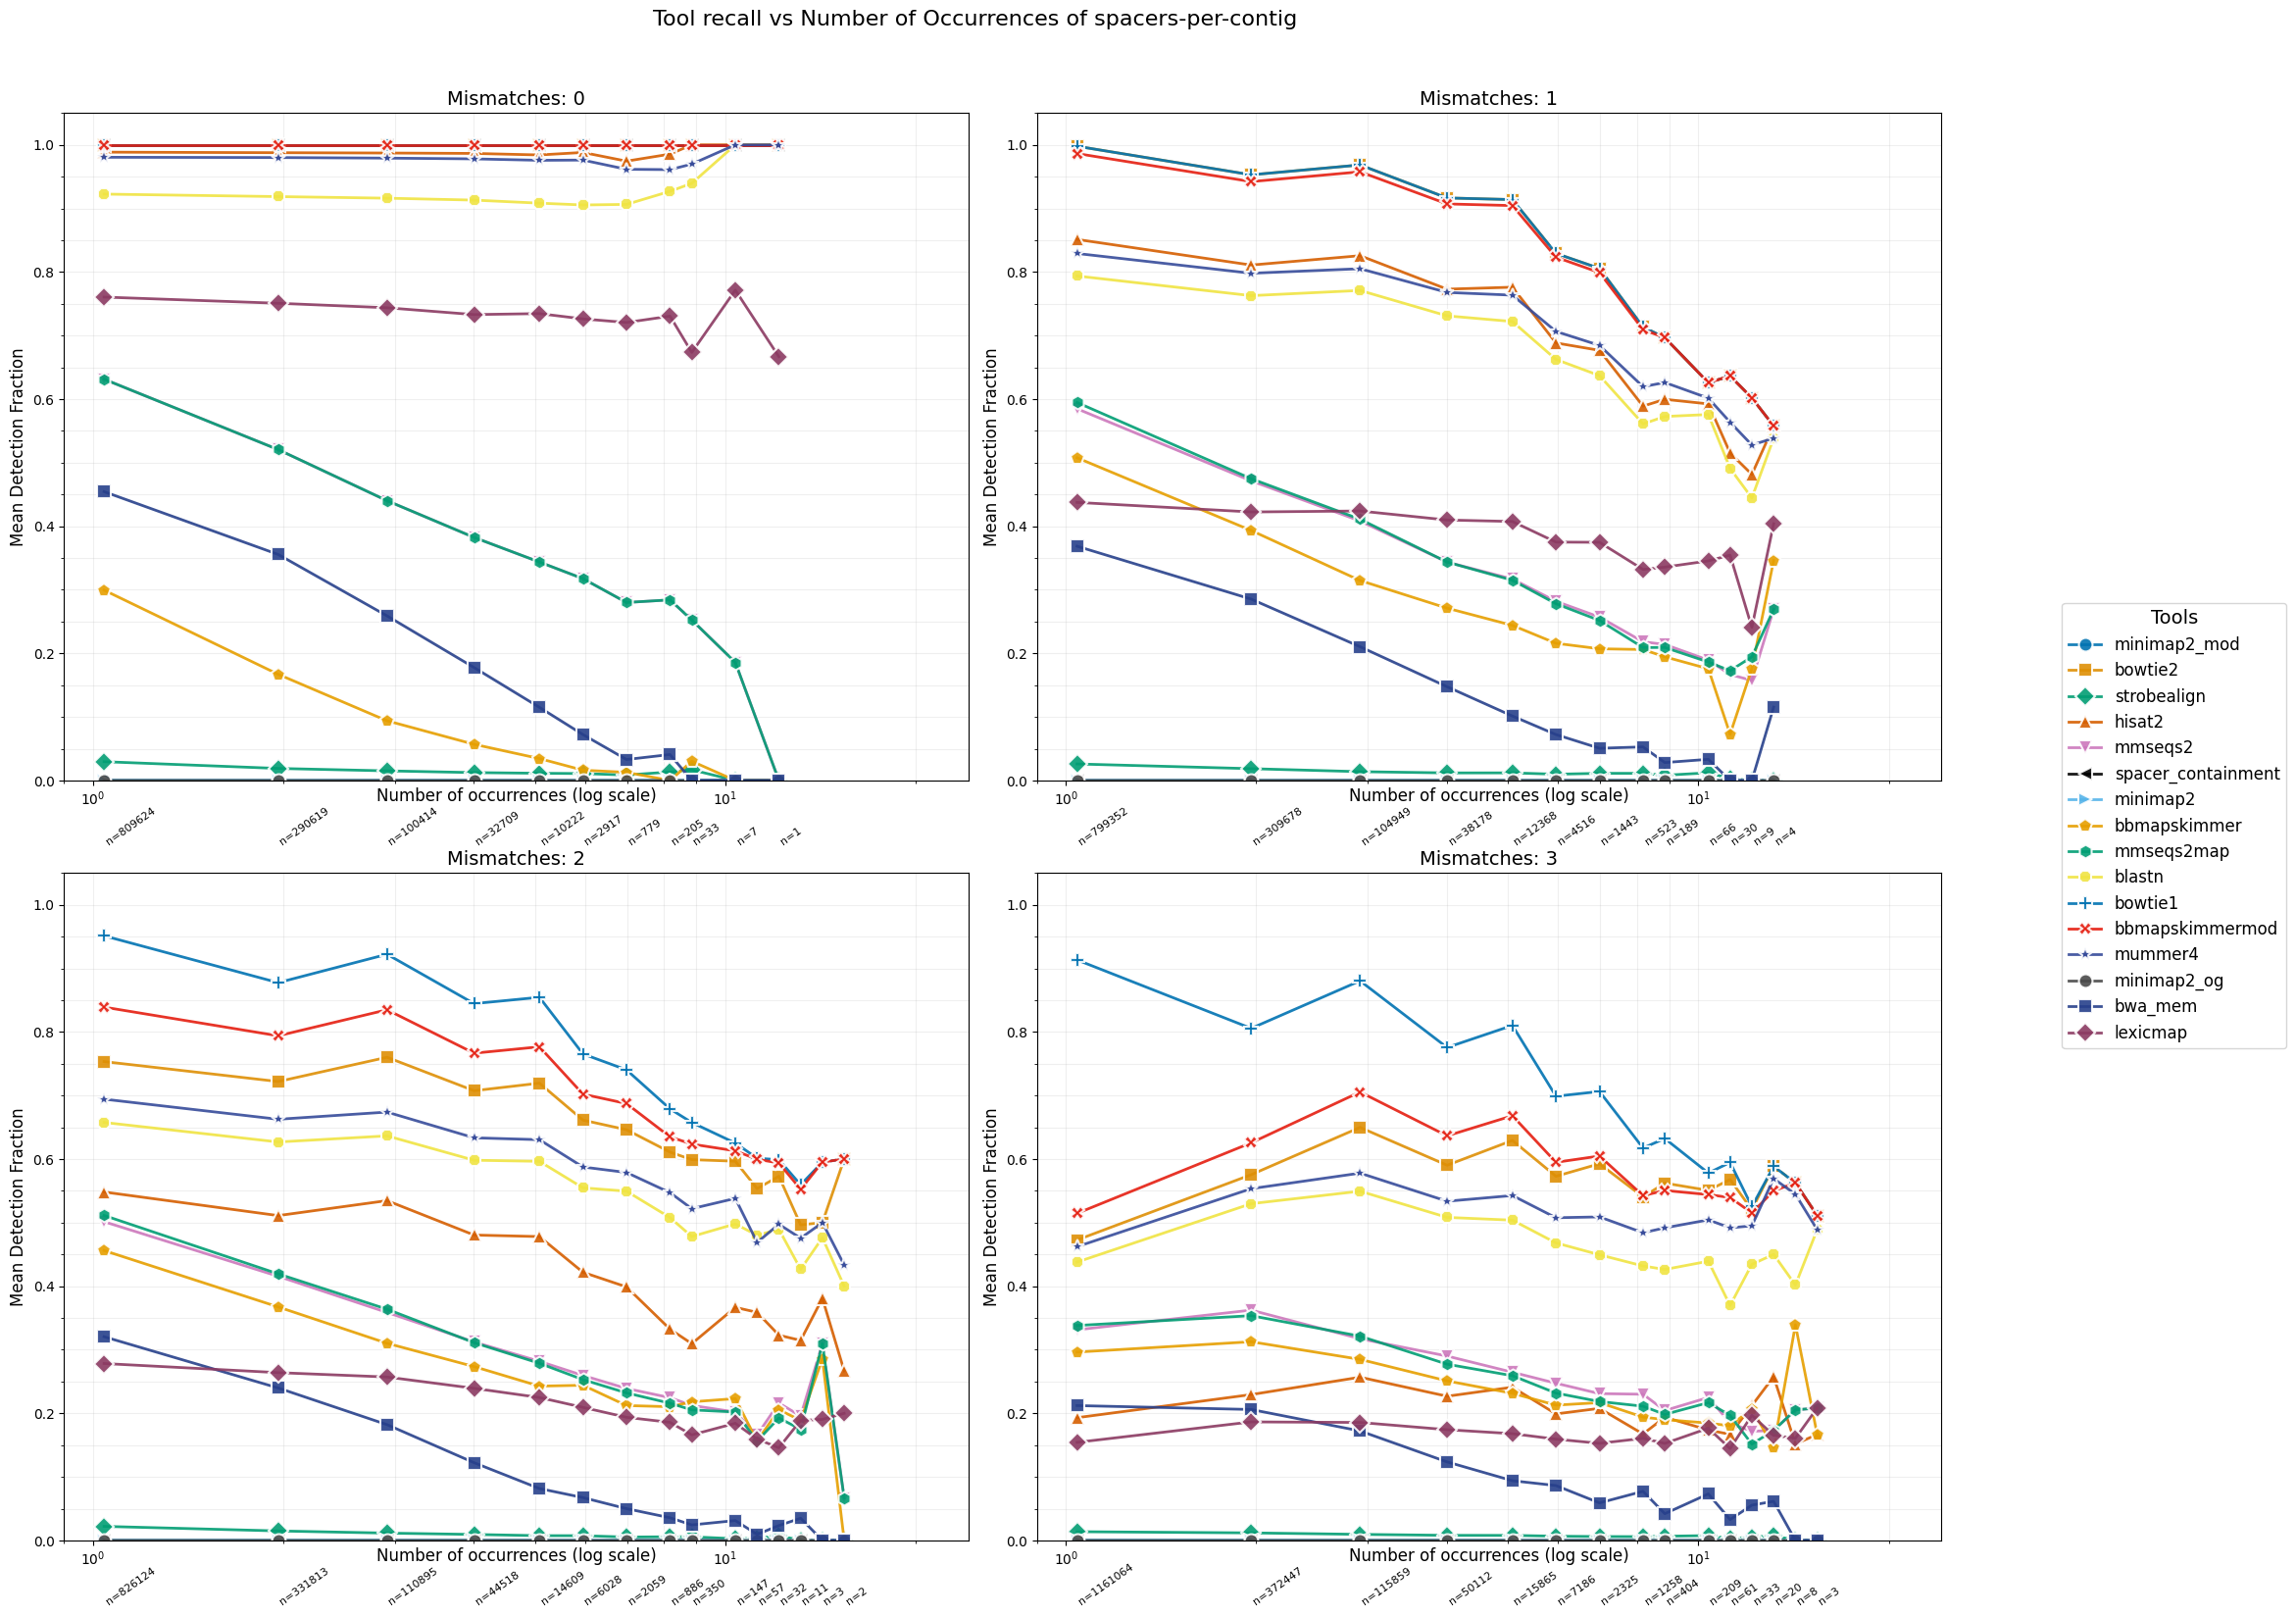

In [53]:
fig = plot_tool_recall_per_spacer_contig_grid(all_ground_truth_verified, recalced_results, tools_list, output_prefix='results/simulated/plots/tool_recall_per_spacer_contig_grid_log')
fig 

Next, plotting of recall per mismatch - but on a spacer occurences basis, not spacer-contig-pair occurences 

In [54]:
def plot_tool_per_spacer_recall_grid(ground_truth_verified, tool_results, tools_list, 
                             output_prefix='results/simulated/plots/tool_per_spacer_recall_grid', n_bins=17):
    """Plot tool performance vs number of occurrences for 0-3 mismatches in a grid."""
    
    # Define consistent markers and colors (previous code unchanged)
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8', 'P', 'X', '*']
    colors = [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#000000', 
        '#56B4E9', '#E69F00', '#009E73', '#F0E442', '#0072B2', '#E51E10', 
        '#364B9A', '#4A4A4A', '#27408B', '#8B3A62', '#654522', '#B22222', 
        '#3CB371', '#CD853F'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Get global min and max occurrences (previous code unchanged)
    global_min_occ = float('inf')
    global_max_occ = 0
    
    for n_mismatch in range(4):
        spacer_counts = create_spacer_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        if spacer_counts is not None and spacer_counts.height > 0:
            min_occ = spacer_counts['n_occurrences'].min()
            max_occ = spacer_counts['n_occurrences'].max()
            global_min_occ = min(global_min_occ, min_occ)
            global_max_occ = max(global_max_occ, max_occ)
    
    legend_elements = []
    
    # Second pass to create plots
    for n_mismatch in range(4):
        ax = axes[n_mismatch]
        
        spacer_counts = create_spacer_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        
        if spacer_counts is None or spacer_counts.height == 0:
            ax.text(0.5, 0.5, f'No data for {n_mismatch} mismatches', 
                   ha='center', va='center')
            continue
            
        # Create logarithmic bins
        n_bins = min(n_bins, spacer_counts.height)
        bins = np.logspace(np.log10(max(1, global_min_occ)), np.log10(global_max_occ), n_bins)

        # Calculate stats for each bin
        bin_stats = []
        for i in range(len(bins)-1):
            mask = (spacer_counts['n_occurrences'] >= bins[i]) & \
                   (spacer_counts['n_occurrences'] < bins[i+1])
            bin_data = spacer_counts.filter(mask)
            
            if bin_data.height > 0:
                stats = {
                    'bin_start': bins[i],
                    'bin_end': bins[i+1],
                    'n_spacers': bin_data.height
                }
                for tool in tools_list:
                    stats[tool] = bin_data[f'{tool}'].mean()
                bin_stats.append(stats)
        
        if bin_stats:
            # Plot for each tool
            for idx, tool in enumerate(tools_list):
                x = [(stat['bin_start'] + stat['bin_end'])/2 for stat in bin_stats]
                y = [stat[tool] for stat in bin_stats]
                marker = markers[idx % len(markers)]
                color = colors[idx % len(colors)]
                
                line = ax.plot(x, y, 
                             color=color,
                             marker=marker,
                             markersize=10,
                             linewidth=2,
                             label=tool,
                             markerfacecolor=color,
                             markeredgecolor='white',
                             markeredgewidth=1.5,
                             alpha=0.9)
                
                if n_mismatch == 0:
                    legend_elements.append(line[0])
            
            # Add sample size annotations for each bin
            for i, stat in enumerate(bin_stats):
                x_pos = (stat['bin_start'] + stat['bin_end'])/2
                # Position the text above the plot area
                ax.text(x_pos, -0.08, f'n={stat["n_spacers"]}', 
                       rotation=35,
                       ha='left',
                       va='bottom',
                       fontsize=8,
                       transform=ax.get_xaxis_transform()
                       )

        ax.set_xscale('log')
        ax.set_xlabel('Number of occurrences (log scale)', fontsize=12, labelpad=-15)
        ax.set_ylabel('Mean Detection Fraction', fontsize=12)
        ax.set_title(f'Mismatches: {n_mismatch}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        ax.minorticks_on()
        ax.set_ylim(0, 1.05)
        ax.set_xlim(global_min_occ * 0.9, global_max_occ * 1.1)

    # Create legend (previous code unchanged)
    fig.legend(legend_elements, tools_list, 
              bbox_to_anchor=(1.05, 0.5),
              loc='center left',
              fontsize=12,
              title='Tools',
              title_fontsize=14)
    
    plt.suptitle('Tool recall vs Number of spacer occurrences', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}.pdf', bbox_inches='tight', dpi=300)
    plt.close()

    return fig

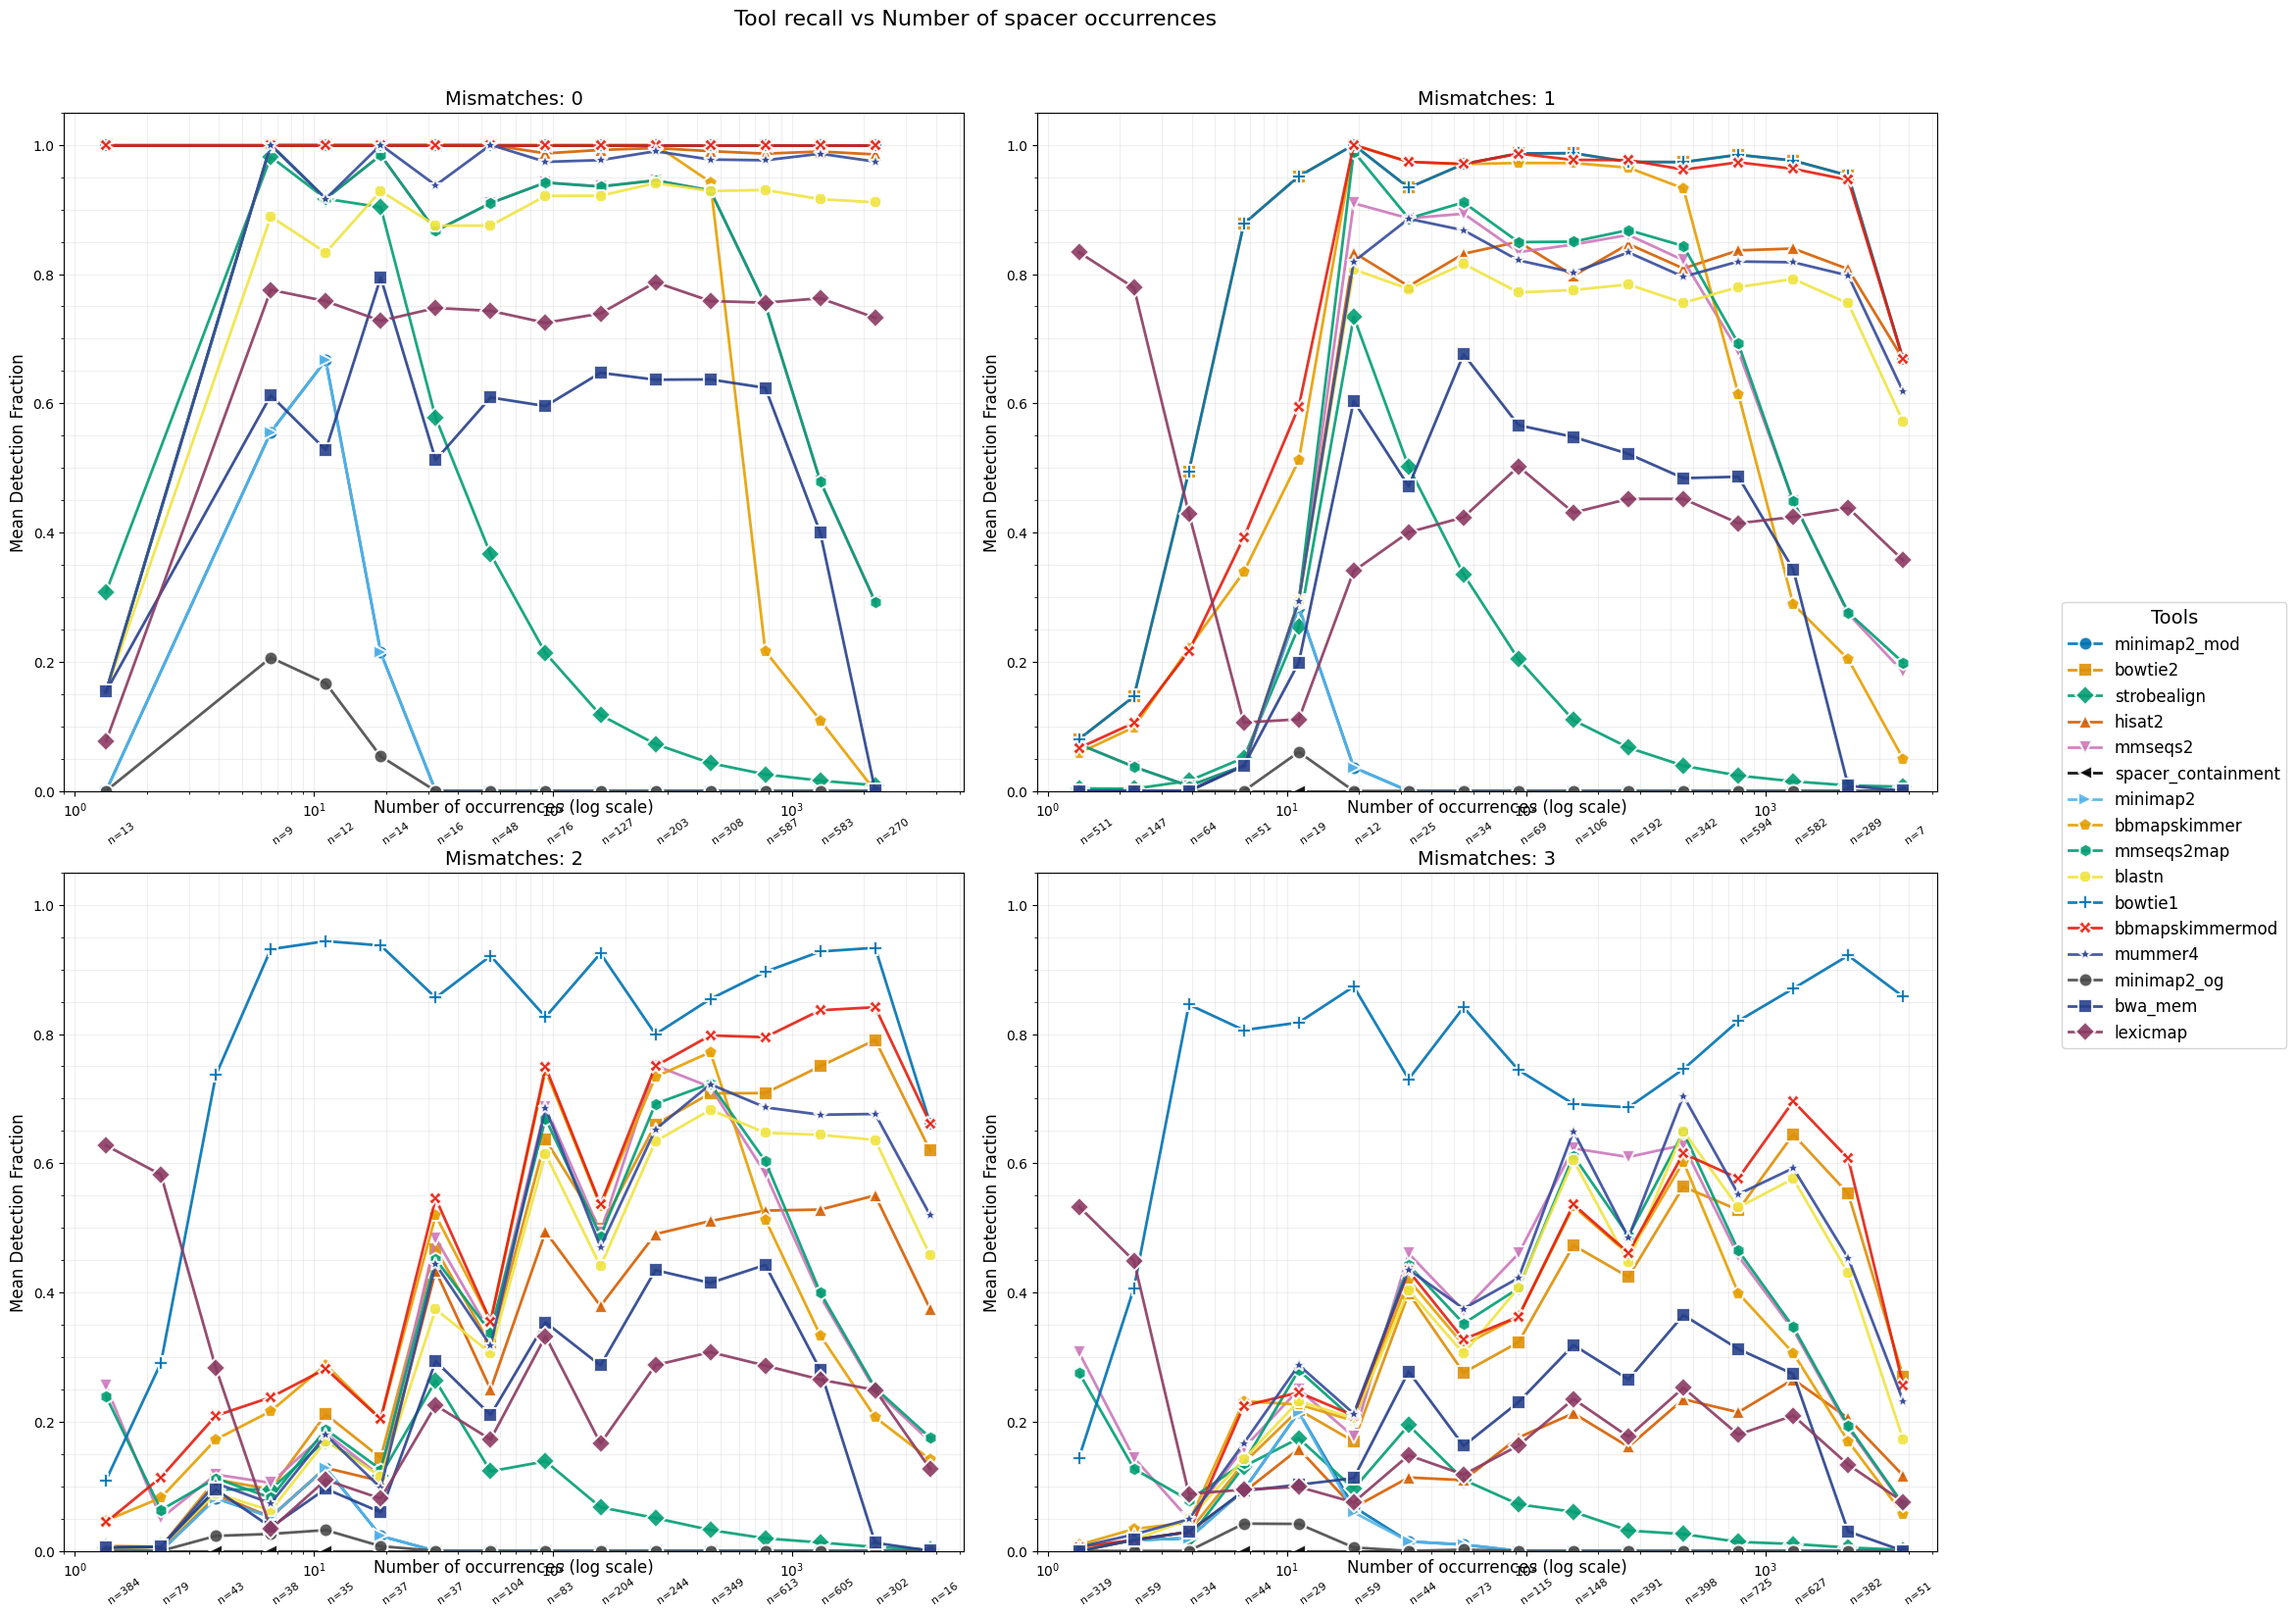

In [55]:
fig = plot_tool_per_spacer_recall_grid(all_ground_truth_verified, recalced_results, tools_list, output_prefix='results/simulated/plots/tool_recall_per_spacer_only_grid_log')
fig 


In [68]:
def create_bins(spacer_counts, n_bins, binning_method='log'):
    """Create bins based on the specified method, but always maintain logarithmic x-axis display."""
    occurrences = spacer_counts['n_occurrences']
    min_occ = max(1, occurrences.min())
    max_occ = occurrences.max()
    
    if binning_method == 'log':
        return np.logspace(np.log10(min_occ), np.log10(max_occ), n_bins)
    elif binning_method == 'linear':
        # Create linear bins in log space
        log_min = np.log10(min_occ)
        log_max = np.log10(max_occ)
        # Create linear spacing in log space, then convert back
        return np.power(10, np.linspace(log_min, log_max, n_bins))
    elif binning_method == 'fixed_size':
        # Sort occurrences and split into equal-sized groups
        sorted_occ = np.sort(occurrences)
        indices = np.linspace(0, len(sorted_occ), n_bins, endpoint=True).astype(int)
        bins = [min_occ]  # Start with minimum
        for idx in indices[1:-1]:
            bins.append(sorted_occ[idx])
        bins.append(max_occ)  # End with maximum
        return np.array(bins)
    else:
        raise ValueError(f"Unknown binning method: {binning_method}")


In [89]:
def create_spacer_counts_with_tools(all_ground_truth_verified, recalced_results, tools_list, mismatches,):
    """Create a DataFrame with tool performance per spacer for simulated data."""
    # Filter for current mismatch level
    gt_subset = all_ground_truth_verified.filter(pl.col("mismatches") == mismatches)
    tr_subset = recalced_results.filter(pl.col("mismatches") == mismatches)
    
    # First calculate per-contig matches and fractions
    spacer_contig_counts = gt_subset.select(["spacer_id", "contig_id"])\
        .group_by('spacer_id', 'contig_id')\
        .agg(pl.count('contig_id').alias('contig_occurrences'))
    
    # Create a cross join of all spacer-contig pairs with all tools
    all_combinations = spacer_contig_counts.select('spacer_id', 'contig_id', 'contig_occurrences')\
        .join(
            pl.DataFrame({'tool': tools_list}),
            how='cross'
        )
    
    # Calculate matches per tool, spacer, and contig
    tool_matches = tr_subset\
        .select(['spacer_id', 'tool', 'contig_id'])\
        .group_by(['spacer_id', 'tool', 'contig_id'])\
        .agg(pl.count('contig_id').alias('tool_matches'))
    
    # Calculate per-contig fractions
    contig_fractions = all_combinations\
        .join(
            tool_matches,
            on=['spacer_id', 'contig_id', 'tool'],
            how='left'
        )\
        .with_columns([
            pl.col('tool_matches').fill_null(0),
            (pl.col('tool_matches') / pl.col('contig_occurrences')).alias('fraction')
        ])
    
    # Get total occurrences per spacer
    total_occurrences = gt_subset["spacer_id"].value_counts().rename(mapping={'count': 'n_occurrences'})
    
    # Average the fractions per spacer
    spacer_counts_with_tools = contig_fractions\
        .group_by(['spacer_id', 'tool'])\
        .agg(pl.col('fraction').mean().alias('fraction'))\
        .join(total_occurrences, on='spacer_id')\
        .pivot(
            index=['spacer_id', 'n_occurrences'],
            on='tool',
            values='fraction'
        )\
        .fill_null(0)
    
    return spacer_counts_with_tools


def plot_tool_per_spacer_recall_grid(ground_truth_verified, tool_results, tools_list, 
                             output_prefix='results/simulated/plots/tool_per_spacer_recall_grid', 
                             n_bins=17, binning_method='log'):
    """
    Plot tool performance vs number of occurrences for 0-3 mismatches in a grid.
    X-axis is always logarithmic, but bin spacing can be:
        - 'log': logarithmic bins
        - 'linear': linear bins in log space
        - 'fixed_size': bins with equal number of observations
    """

    
    # Define consistent markers and colors (previous code unchanged)
    markers = ['o', 's', 'D', '^', 'v', '<', '>', 'p', 'h', '8', 'P', 'X', '*']
    colors = [
        '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC', '#000000', 
        '#56B4E9', '#E69F00', '#009E73', '#F0E442', '#0072B2', '#E51E10', 
        '#364B9A', '#4A4A4A', '#27408B', '#8B3A62', '#654522', '#B22222', 
        '#3CB371', '#CD853F'
    ]
    
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    axes = axes.flatten()
    
    # Get global min and max occurrences
    global_min_occ = float('inf')
    global_max_occ = 0
    
    for n_mismatch in range(4):
        spacer_counts = create_spacer_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        if spacer_counts is not None and spacer_counts.height > 0:
            min_occ = spacer_counts['n_occurrences'].min()
            max_occ = spacer_counts['n_occurrences'].max()
            global_min_occ = min(global_min_occ, min_occ)
            global_max_occ = max(global_max_occ, max_occ)
    
    legend_elements = []
    
    # Second pass to create plots
    for n_mismatch in range(4):
        ax = axes[n_mismatch]
        
        spacer_counts = create_spacer_counts_with_tools(ground_truth_verified, tool_results, tools_list, n_mismatch)
        
        if spacer_counts is None or spacer_counts.height == 0:
            ax.text(0.5, 0.5, f'No data for {n_mismatch} mismatches', 
                   ha='center', va='center')
            continue
            
        # Create bins based on selected method
        n_bins = min(n_bins, spacer_counts.height)
        bins = create_bins(spacer_counts, n_bins, binning_method)

        # Calculate stats for each bin
        bin_stats = []
        for i in range(len(bins)-1):
            mask = (spacer_counts['n_occurrences'] >= bins[i]) & \
                   (spacer_counts['n_occurrences'] < bins[i+1])
            bin_data = spacer_counts.filter(mask)
            
            if bin_data.height > 0:
                stats = {
                    'bin_start': bins[i],
                    'bin_end': bins[i+1],
                    'n_spacers': bin_data.height
                }
                for tool in tools_list:
                    stats[tool] = bin_data[f'{tool}'].mean()
                bin_stats.append(stats)
        
        if bin_stats:
            # Plot for each tool
            for idx, tool in enumerate(tools_list):
                if binning_method == 'log':
                    # For log binning, keep using bin edges midpoint
                    x = [(stat['bin_start'] + stat['bin_end'])/2 for stat in bin_stats]
                else:
                    # For linear and fixed binning, calculate mean of actual data points
                    x = []
                    for i in range(len(bin_stats)):
                        mask = (spacer_counts['n_occurrences'] >= bin_stats[i]['bin_start']) & \
                               (spacer_counts['n_occurrences'] < bin_stats[i]['bin_end'])
                        bin_data = spacer_counts.filter(mask)
                        x.append(bin_data['n_occurrences'].mean())
                
                y = [stat[tool] for stat in bin_stats]
                marker = markers[idx % len(markers)]
                color = colors[idx % len(colors)]
                
                line = ax.plot(x, y, 
                             color=color,
                             marker=marker,
                             markersize=10,
                             linewidth=2,
                             label=tool,
                             markerfacecolor=color,
                             markeredgecolor='white',
                             markeredgewidth=1.5,
                             alpha=0.9)
                
                if n_mismatch == 0:
                    legend_elements.append(line[0])
            
            # Add sample size annotations for each bin
            for i, stat in enumerate(bin_stats):
                x_pos = (stat['bin_start'] + stat['bin_end'])/2
                # Position the text above the plot area
                ax.text(x_pos, -0.08, f'n={stat["n_spacers"]}', 
                       rotation=35,
                       ha='left',
                       va='bottom',
                       fontsize=8,
                       transform=ax.get_xaxis_transform()
                       )

        # X-axis is always logarithmic
        ax.set_xscale('log')
        
        # Update xlabel to reflect that x-axis is always log scale
        if binning_method == 'log':
            bin_desc = "logarithmic bins"
        elif binning_method == 'linear':
            bin_desc = "linear bins in log space"
        else:
            bin_desc = "equal-sized bins"
            
        ax.set_xlabel(f'Number of occurrences (log scale, {bin_desc})', fontsize=12, labelpad=-15)
        ax.set_ylabel('Mean Detection Fraction', fontsize=12)
        ax.set_title(f'Mismatches: {n_mismatch}', fontsize=14)
        ax.grid(True, which="both", ls="-", alpha=0.2)
        ax.minorticks_on()
        ax.set_ylim(0, 1.05)
        ax.set_xlim(global_min_occ * 0.9, global_max_occ * 1.1)

    # Create legend (previous code unchanged)
    fig.legend(legend_elements, tools_list, 
              bbox_to_anchor=(1.05, 0.5),
              loc='center left',
              fontsize=12,
              title='Tools',
              title_fontsize=14)
    
    plt.suptitle('Tool recall vs Number of spacer occurrences', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.savefig(f'{output_prefix}.pdf', bbox_inches='tight', dpi=300)
    plt.close()

    return fig

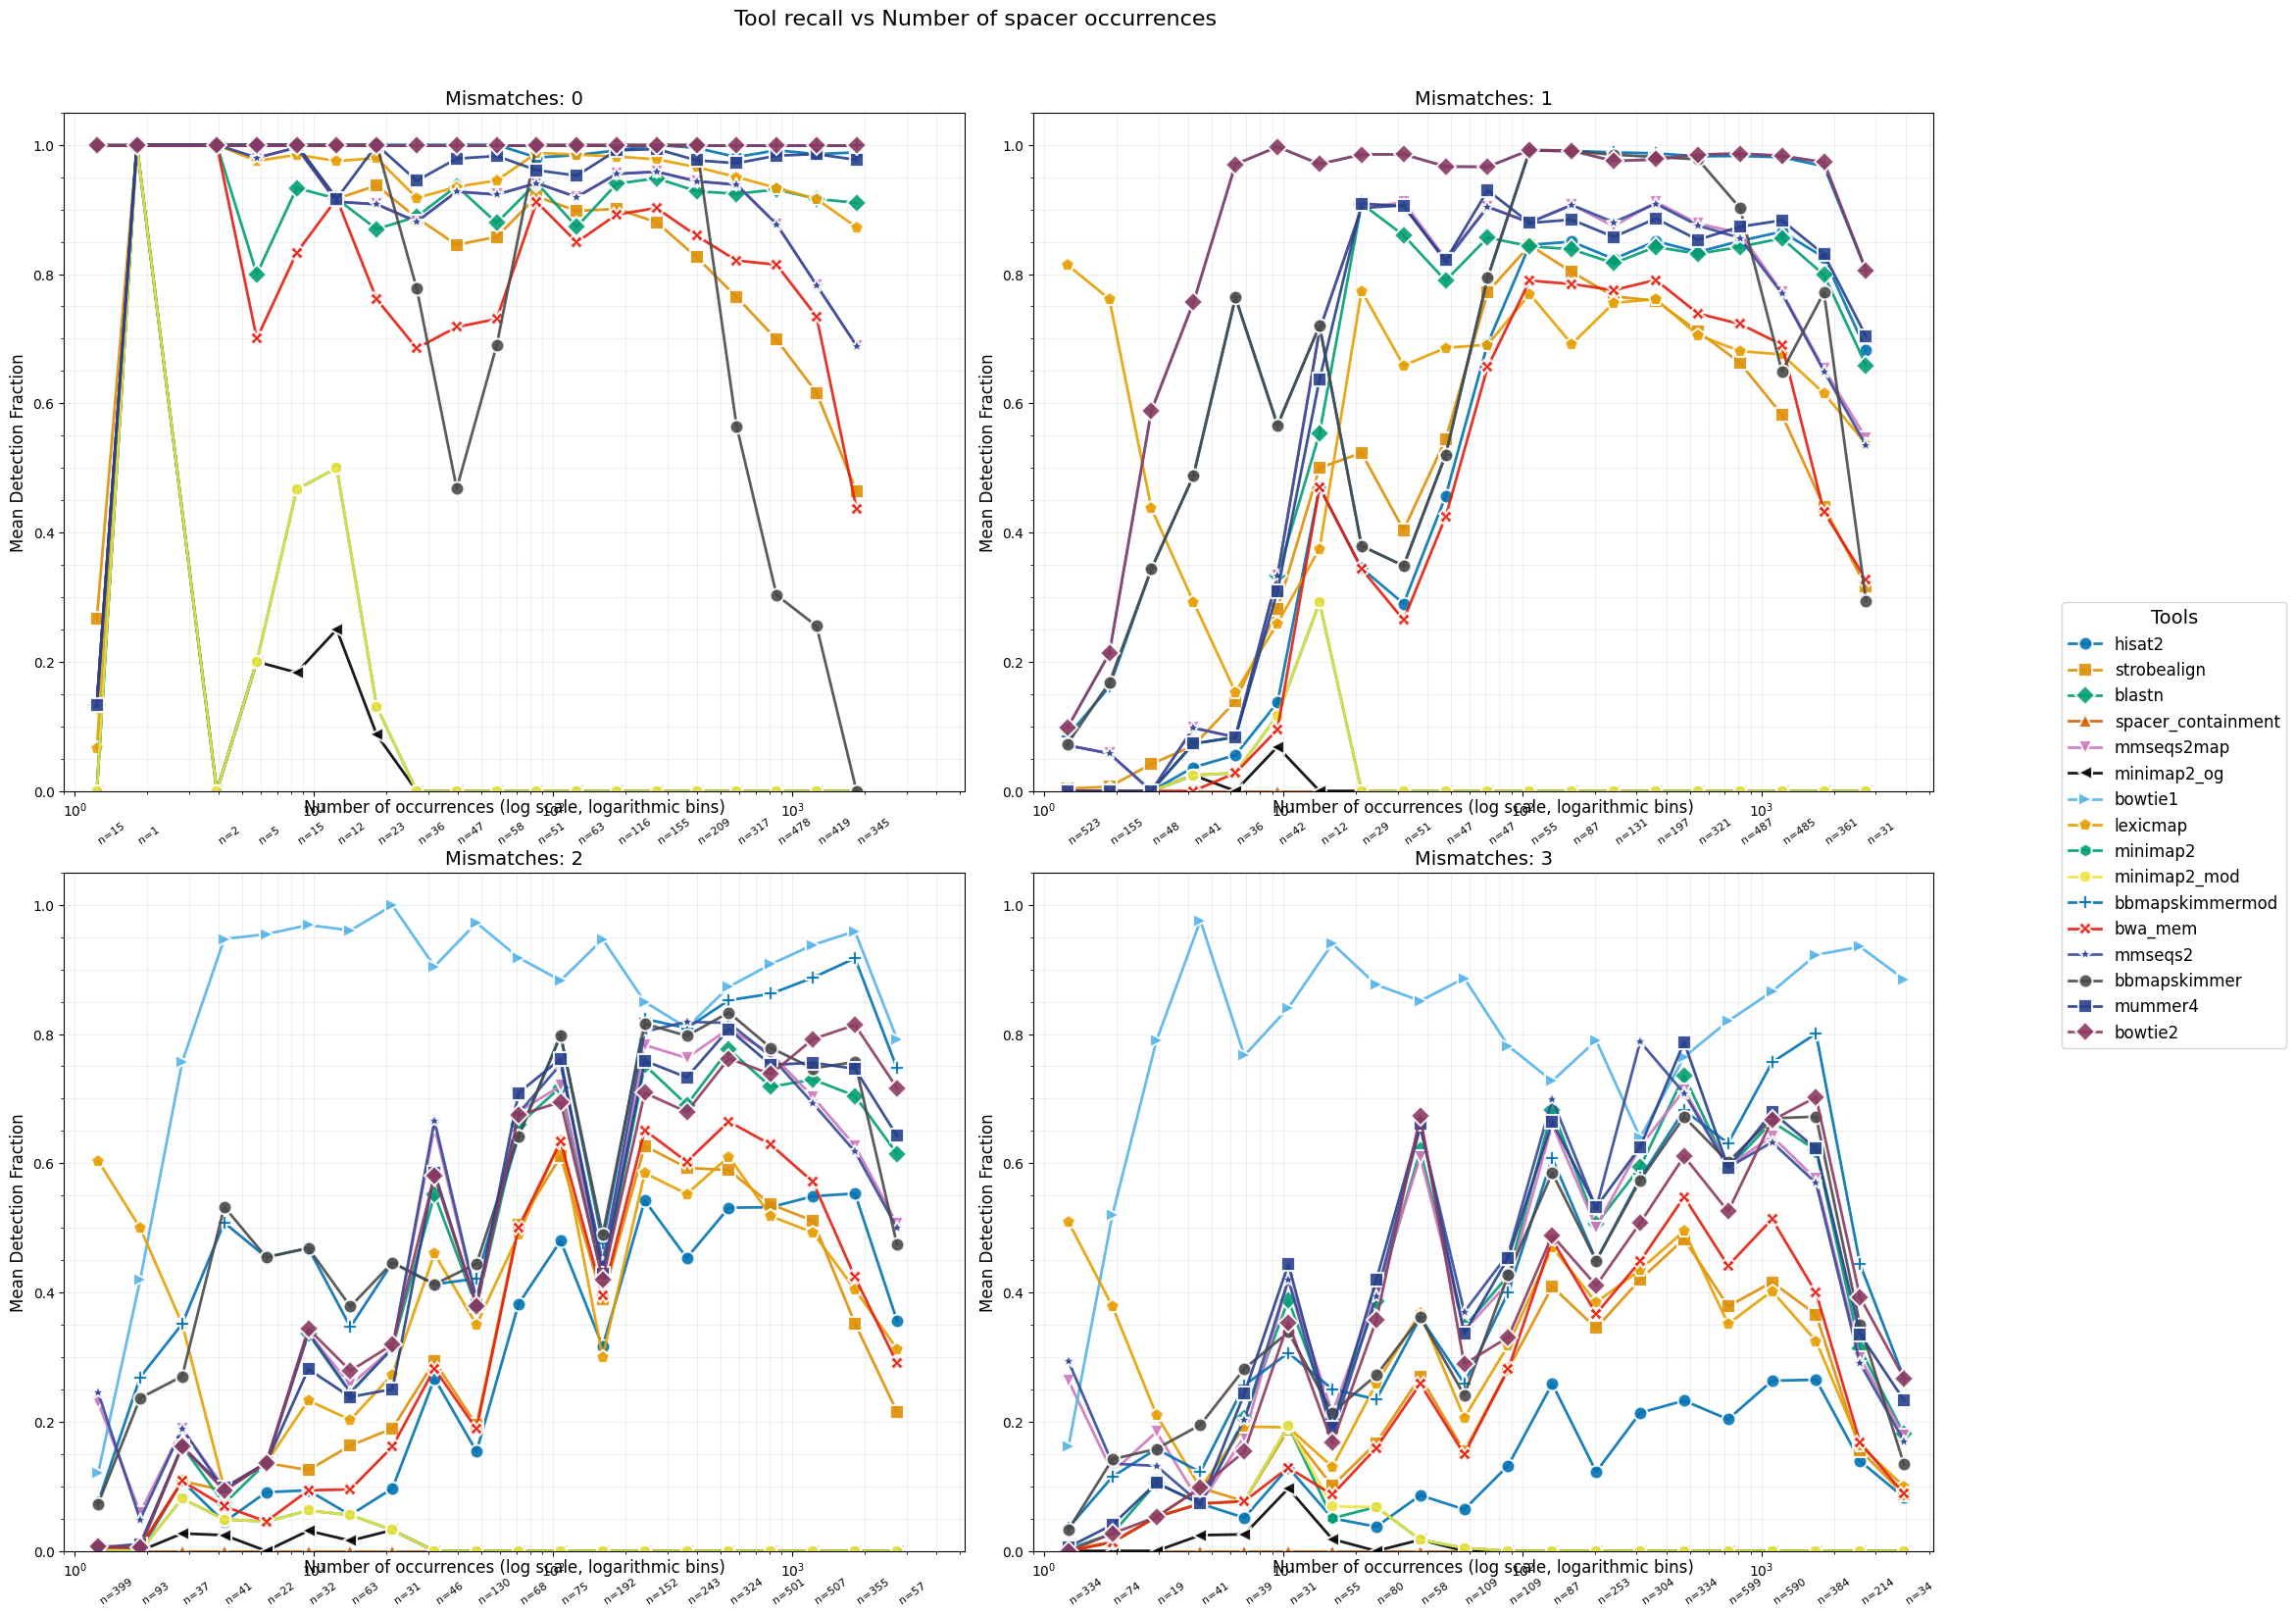

In [91]:
#  logarithmic binning
plot_tool_per_spacer_recall_grid(all_ground_truth_verified, recalced_results, tools_list, 
                                binning_method='log',output_prefix='results/simulated/plots/tool_per_spacer_recall_grid_log',n_bins=21)


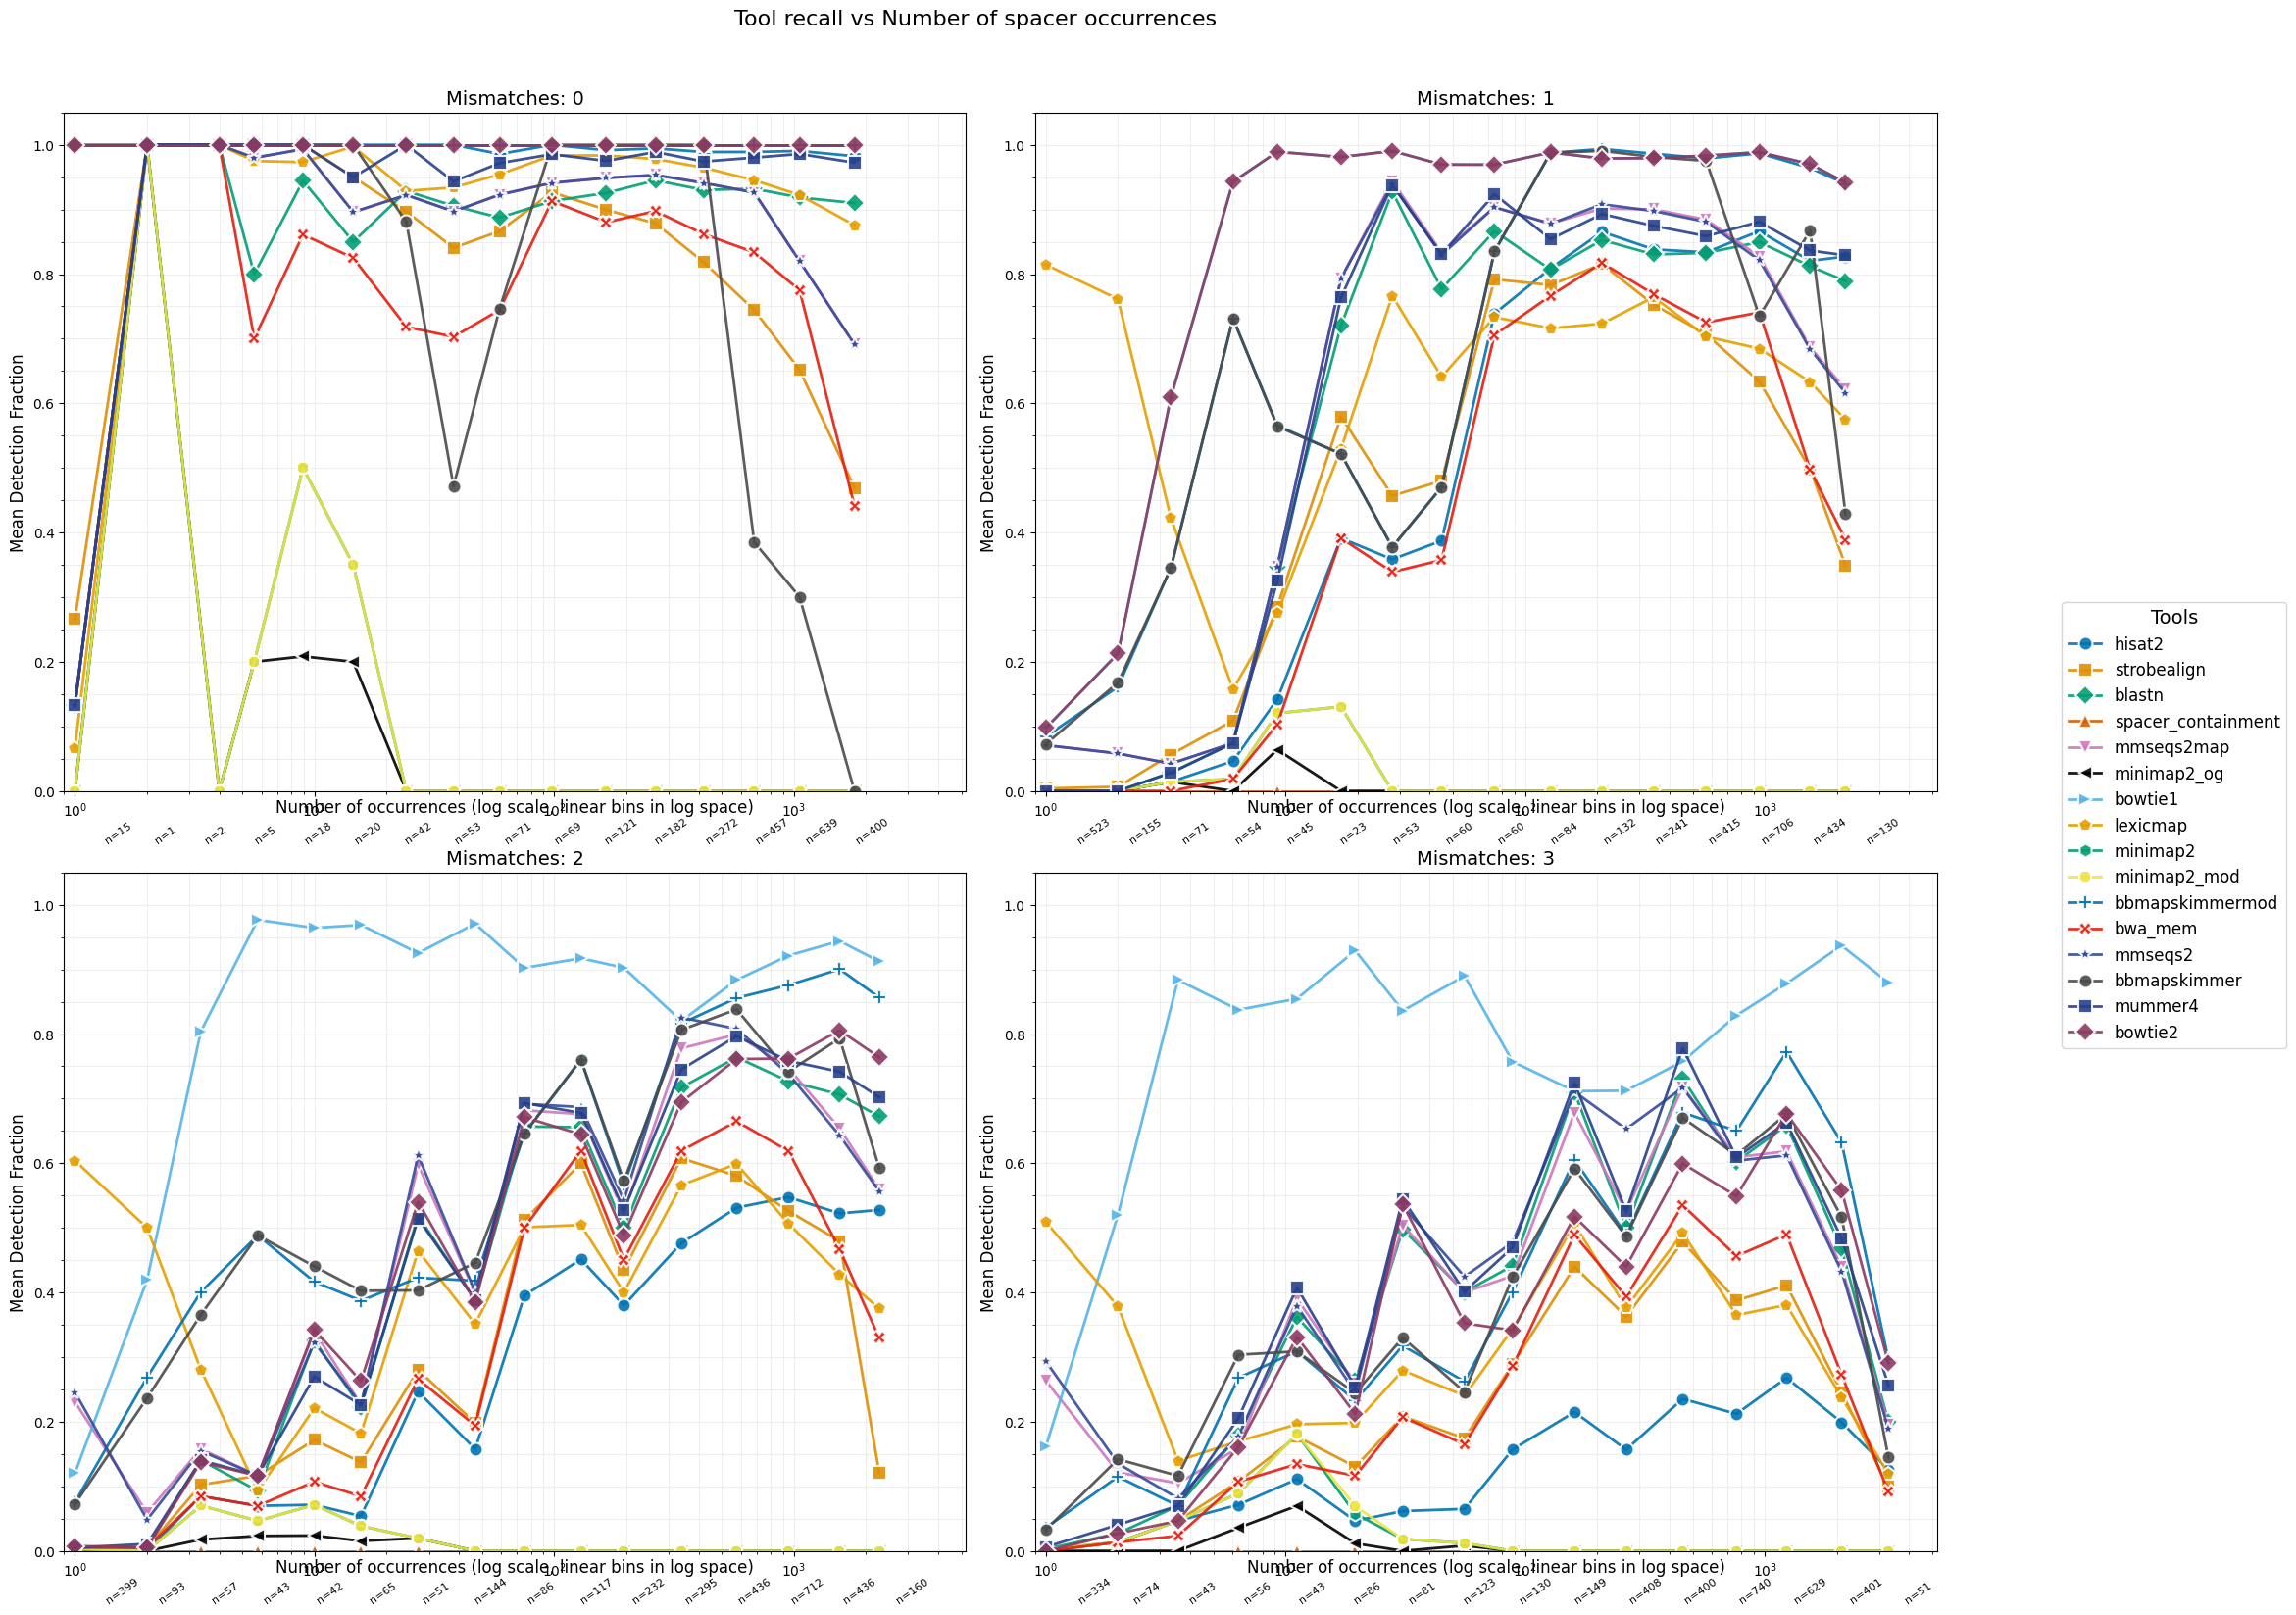

In [93]:
# Linear binning
plot_tool_per_spacer_recall_grid(all_ground_truth_verified, recalced_results, tools_list, 
                                binning_method='linear',output_prefix='results/simulated/plots/tool_per_spacer_recall_grid_linear')

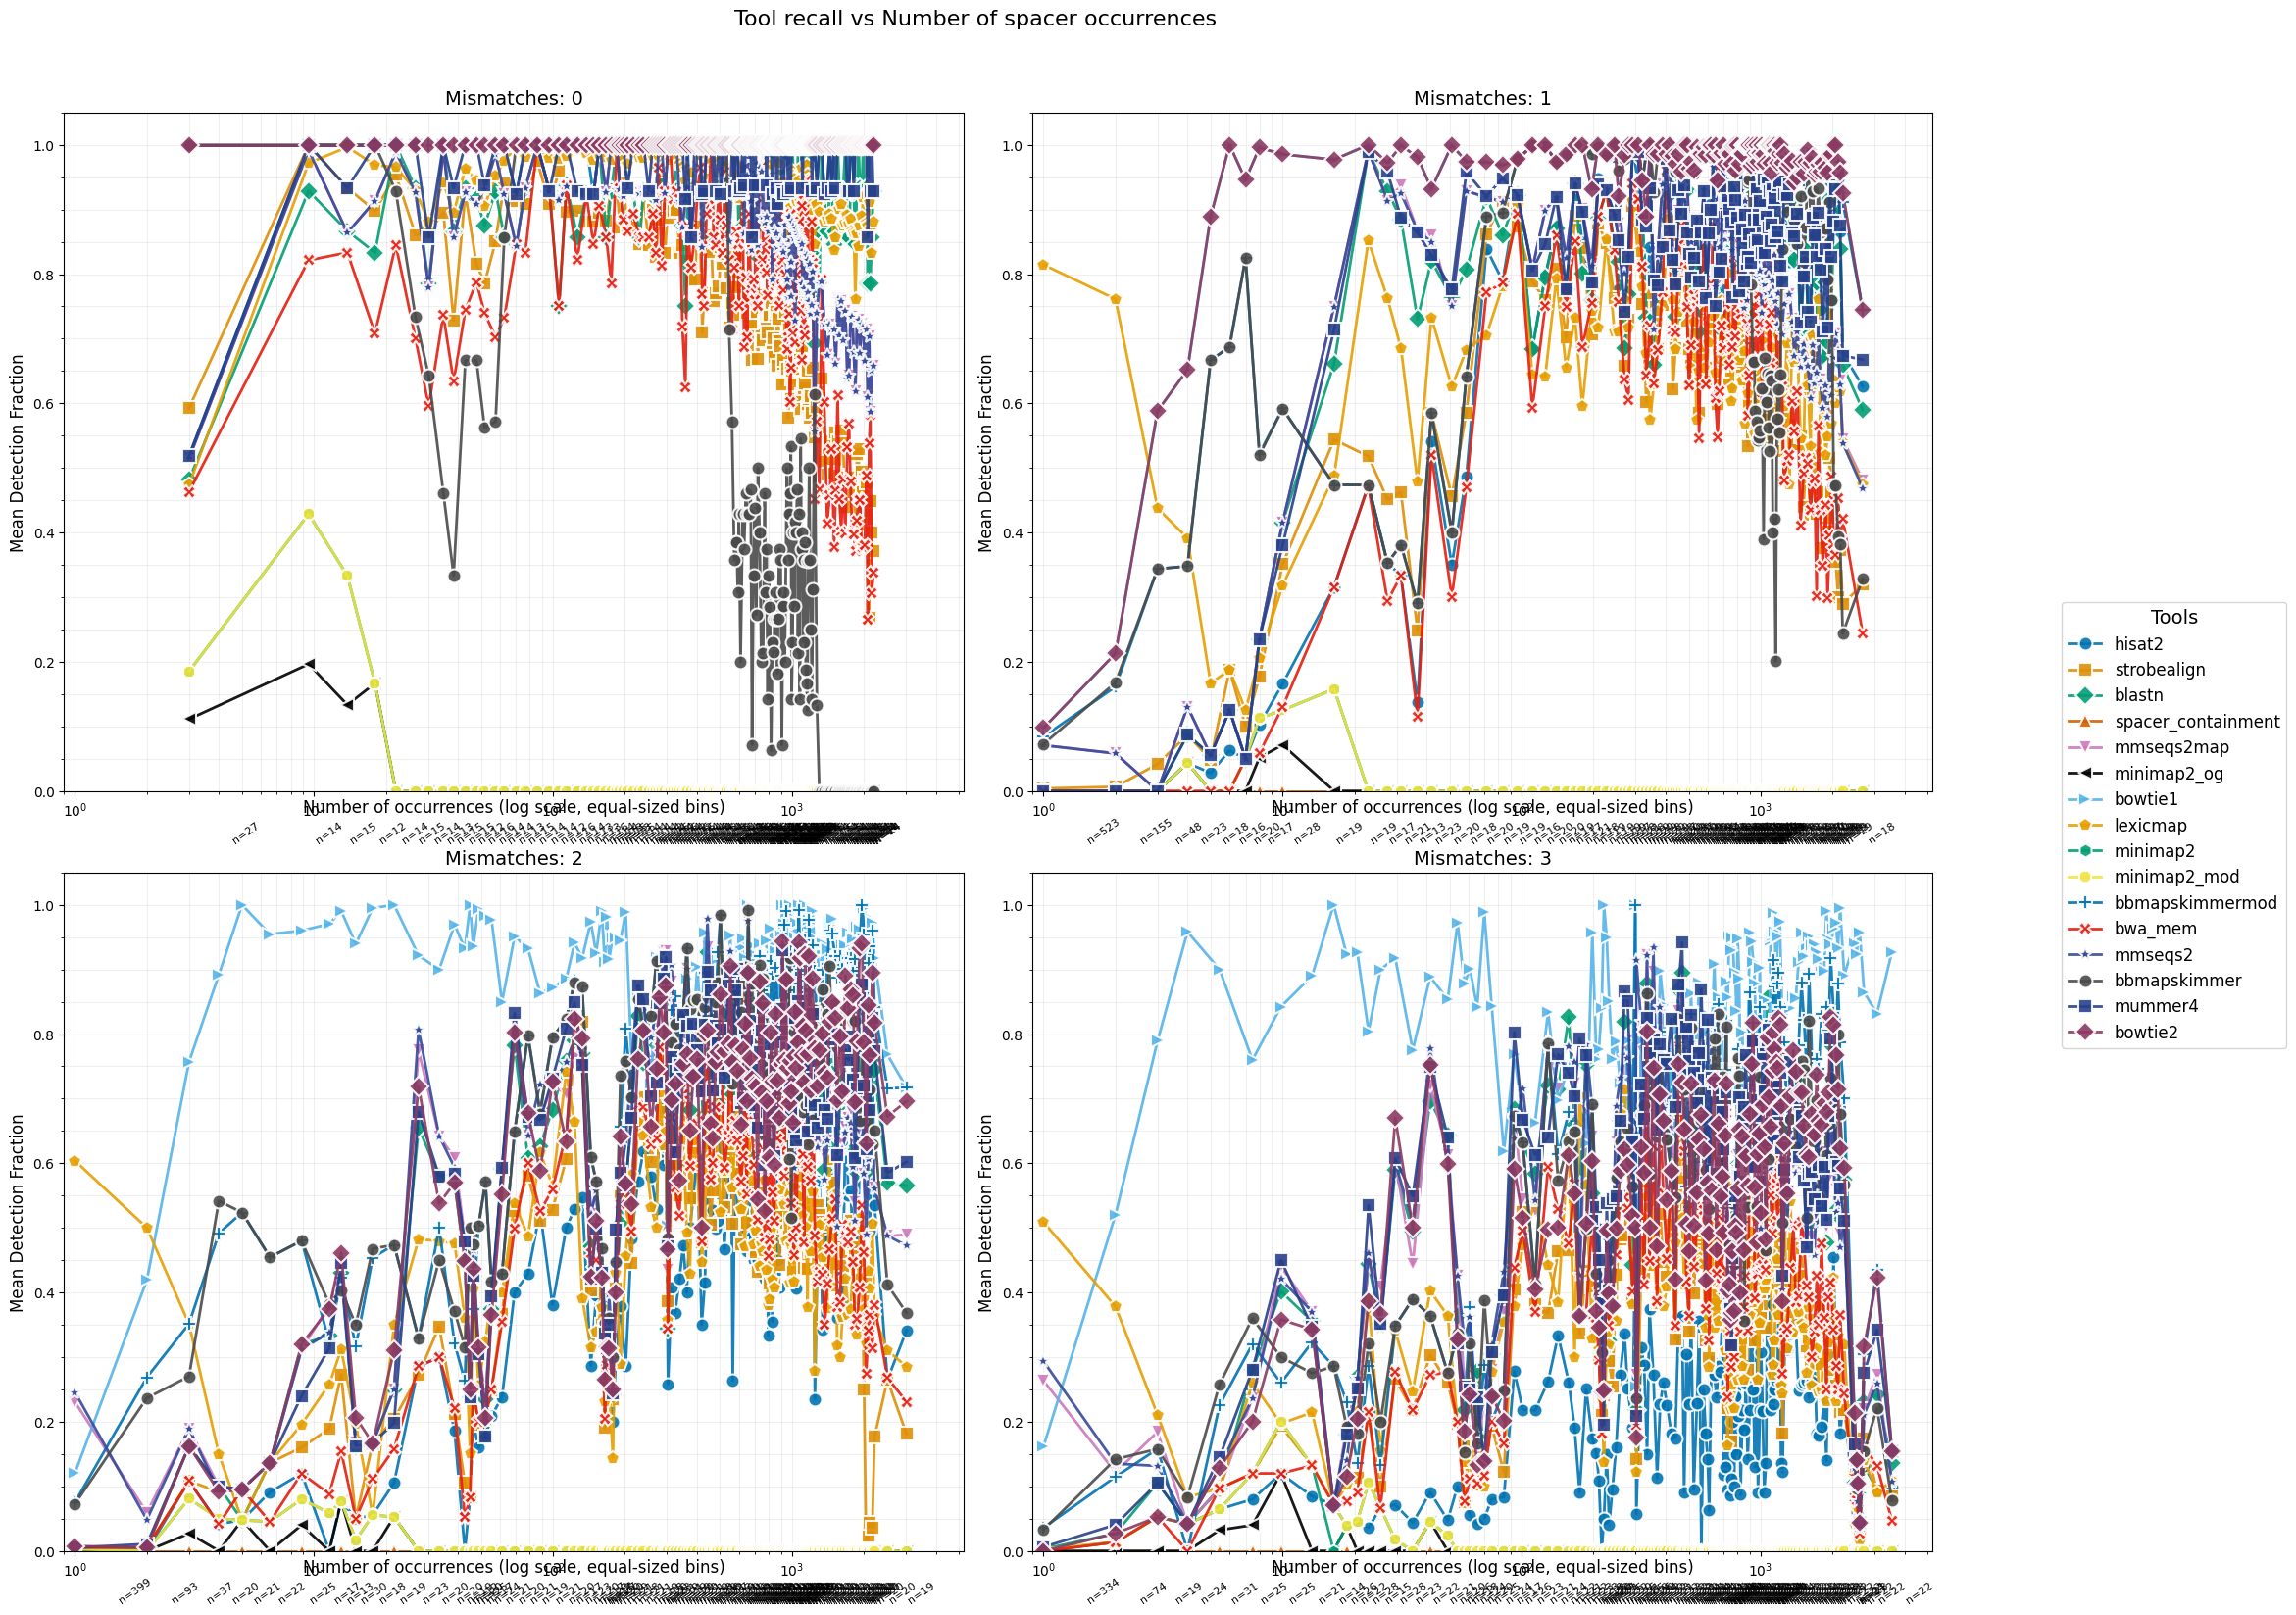

In [94]:
# Fixed-size binning (equal number of observations per bin)
plot_tool_per_spacer_recall_grid(all_ground_truth_verified, recalced_results, tools_list, 
                                binning_method='fixed_size',output_prefix='results/simulated/plots/tool_per_spacer_recall_grid_fixed_size',n_bins=170)

Now we chart the distribution of the spacer lengths, number of mismatches, and number of occurrences.

In [31]:
import altair as alt
import polars as pl

def plot_spacer_distributions(tools_results, spacer_counts_with_tools, output_prefix='results/simulated/plots'):
    """Create a three-panel figure showing spacer length, mismatch, and occurrence distributions using Altair.
    Uses VegaFusion for efficient handling of large datasets.
    """
    # Pre-aggregate in Polars to reduce data size
    spacer_df = tools_results.select([
        'spacer_id', 'contig_id', 'strand', 'start', 'end', 'spacer_length', 'mismatches'
    ]).unique()

    occurrence_df = spacer_counts_with_tools['n_occurrences'].value_counts()
    mismatches_df=spacer_df['mismatches'].value_counts()
    length_df=spacer_df['spacer_length'].value_counts()

   
    # Base chart for occurrence distribution
    base = alt.Chart(occurrence_df).encode(
        tooltip=['n_occurrences:Q', 'count:Q']
    )

    chart3 = base.mark_bar(opacity=0.5).encode(
        alt.X('n_occurrences:Q',
                scale=alt.Scale(type='log'),
                title='Number of Occurrences'),
        alt.Y('count:Q', title='Count (Linear Scale)')
    )
    
    chart1 = alt.Chart(length_df).mark_bar().encode(
        x=alt.X('spacer_length:Q', title='Spacer Length (bp)', axis=alt.Axis(grid=True,tickCount=100,labelAngle=-34,labelFontSize=8)),
        y=alt.Y("count:Q", axis=alt.Axis(title="Number of Spacers", grid=True,ticks=False,gridDash=[2,2]))
    ).properties(
        title='Spacer Lengths',
    )

    chart2 = alt.Chart(mismatches_df).mark_bar(width=13).encode(
        x=alt.X('mismatches:Q', title='Number of Mismatches', axis=alt.Axis(grid=True,tickCount=6)),
        y=alt.Y("count:Q", axis=alt.Axis(title="Number of Spacers",  grid=True,ticks=False,gridDash=[2,2])),
        # color=alt.Color('mismatches:Q', legend=T)
    ).properties(
        title='Mismatches',
    )
    
    combined_chart = chart1 | chart3 | chart2
    return combined_chart

tools_results = recalced_results
spacer_counts_with_tools = create_spacer_counts_with_tools(tools_results, tools_list, mismatches=3,exact_or_max="max")

combined_chart =  plot_spacer_distributions(spacer_counts_with_tools=spacer_counts_with_tools,tools_results=tools_results)

combined_chart.save('./results/simulated/plots/spacer_distributions.html')
combined_chart.save('./results/simulated/plots/spacer_distributions.svg',format='svg')
combined_chart.save('./results/simulated/plots/spacer_distributions.pdf',format='pdf')



Summary Statistics:

Spacer Lengths:
Mean: 32.83
Median: 33.00
Std: 2.69
Min: 25
Max: 100

Mismatches:
Mean: 0.90
Median: 1.00
Std: 1.05
Min: 0
Max: 3

Occurrences:
Mean: 44.67
Median: 7.00
Std: 149.65
Min: 1
Max: 14012


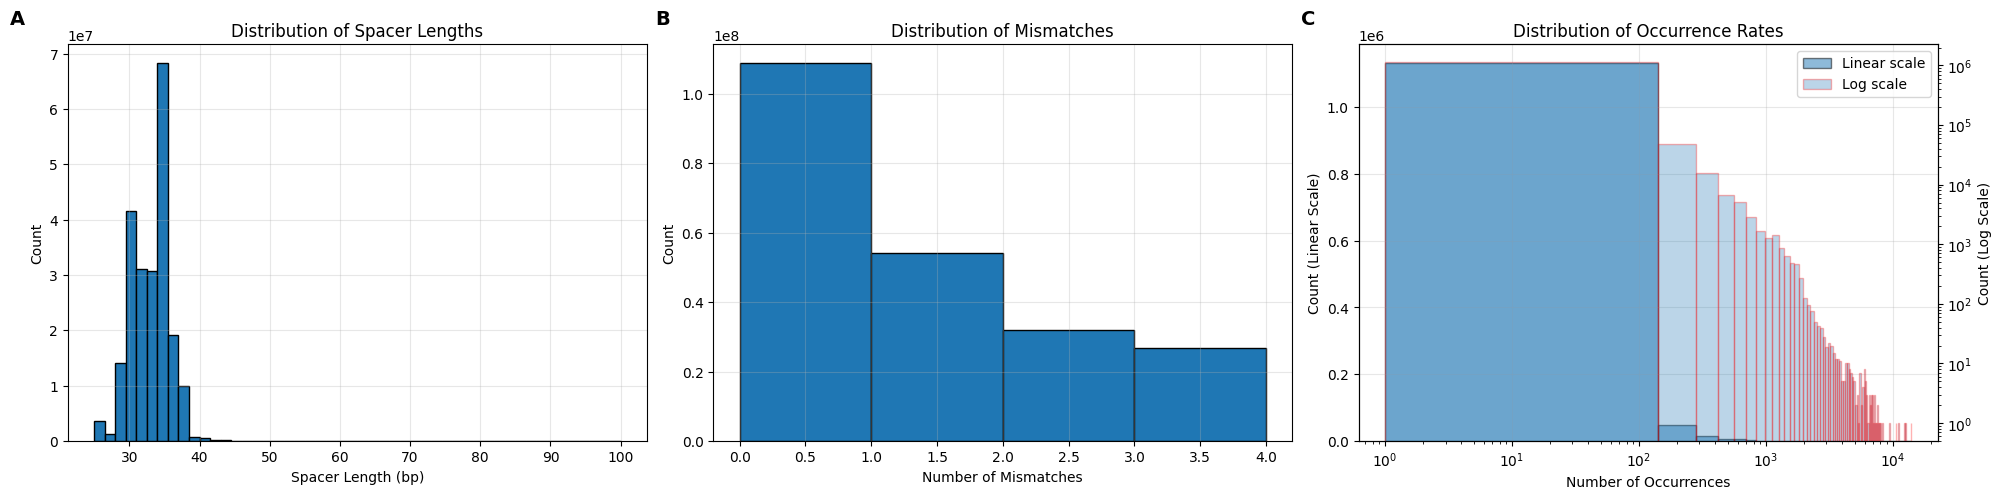

In [ ]:
# Print some summary statistics

spacer_counts_with_tools = create_spacer_counts_with_tools(tools_results, tools_list, mismatches=3,exact_or_max="max")

plot_spacer_distributions(spacer_counts_with_tools=spacer_counts_with_tools,tools_results=tools_results)
print("\nSummary Statistics:")
print("\nSpacer Lengths:")
print(f"Mean: {tools_results['spacer_length'].mean():.2f}")
print(f"Median: {tools_results['spacer_length'].median():.2f}")
print(f"Std: {tools_results['spacer_length'].std():.2f}")
print(f"Min: {tools_results['spacer_length'].min()}")
print(f"Max: {tools_results['spacer_length'].max()}")

print("\nMismatches:")
print(f"Mean: {tools_results['mismatches'].mean():.2f}")
print(f"Median: {tools_results['mismatches'].median():.2f}")
print(f"Std: {tools_results['mismatches'].std():.2f}")
print(f"Min: {tools_results['mismatches'].min()}")
print(f"Max: {tools_results['mismatches'].max()}")

print("\nOccurrences:")
print(f"Mean: {spacer_counts_with_tools['n_occurrences'].mean():.2f}")
print(f"Median: {spacer_counts_with_tools['n_occurrences'].median():.2f}")
print(f"Std: {spacer_counts_with_tools['n_occurrences'].std():.2f}")
print(f"Min: {spacer_counts_with_tools['n_occurrences'].min()}")
print(f"Max: {spacer_counts_with_tools['n_occurrences'].max()}")